### Canada's Response to Economic Impacts of COVID-19
  
Amanda Cheney  
Metis Final Project  
Part 3 of 4  
December 8, 2020    

**Objective**  
Unsupervised learning and natural language processing to identify two sets of clusters of Twitter conversations about the Canadian Emergency Response Benefit (CERB) and Canadian Recovery Benefit (CRB) programs to address unemployment and economic impacts of the COVID-19 pandemic. 

1. One that captures the contours of everyday user conversations. 

2.  Another that highlights clusters of conversation that are really, really dense, have users make collaborative efforts to shape public opinion and perception.  

**Data Sources**  
250,000+ tweets from March 1 - December 1, 2020, collected using snscrape.  

**This Notebook**  
Uses HDBSCAN to identify very dense, high level clusters.

## Imports

In [74]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
from copy import deepcopy 
from collections import Counter

## Import Document Vectors

In [70]:
with open('final_doc_vectors.pickle', 'rb') as read_file:
    doc_vectors = pickle.load(read_file)

In [3]:
len(doc_vectors)

240808

## Load and fit HDBSCAN model

HDBSCAN, or Hierarchical Density-Based Spatial Clustering of Applications with Noise, was an ideal model for clustering this data at a high level for a few reasons. First, unlike say, KMeans, HDBSCAN makes very few assumptions about the underlying nature of the data, only that it contains "noise"--a very critical assumption for Twitter data, which is understood to be inherently very noisy--and some dense regions in the data space, aka "clusters." Additionally, unlike its close relative, DBSCAN, HDBSCAN requires very little parameter tuning - basically just specification of `min_samples`, the number of samples in a neighborhood for a point to be considered a core point, and `min_cluster size` which is the smallest size grouping that can be considered a cluster. `min_cluster size=100`  is a very conservative size for a 240,000+ row data set and `min_samples=15` is set to avoid classifying too much of the data as noise. 

In [7]:
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=15)

In [6]:
%%time
hdbscan_.fit(doc_vectors)

CPU times: user 10h 59min 5s, sys: 8min 49s, total: 11h 7min 54s
Wall time: 18h 18min 35s


HDBSCAN(min_cluster_size=100, min_samples=15)

In [7]:
hdbscan_labels = hdbscan_.labels_

In [8]:
with open('hdbscan_labels.pickle', 'wb') as to_write:
    pickle.dump(hdbscan_labels, to_write)

In [2]:
with open('hdbscan_labels.pickle', 'rb') as read_file:
    hdbscan_labels = pickle.load(read_file)

In [3]:
hdbscan_labels

array([-1, -1, -1, ..., -1, -1, -1])

In [4]:
hdbscan_labels.max()

30

Let's see the breakdown of the HDBSCAN labels.

In [12]:
label_counts = Counter(hdbscan_labels)

In [14]:
print(label_counts)

Counter({-1: 223375, 29: 11200, 27: 1352, 24: 584, 0: 341, 6: 278, 19: 258, 2: 247, 9: 245, 18: 241, 22: 190, 10: 179, 14: 166, 25: 127, 28: 126, 1: 125, 7: 124, 3: 117, 26: 116, 12: 116, 4: 114, 30: 114, 11: 113, 5: 112, 16: 109, 13: 109, 8: 108, 17: 108, 23: 107, 21: 104, 15: 102, 20: 101})


With the current parameters, HDBSCAN regards 92.7% of the tweets as noise. This is not an unexpected result given HDBSCAN's emphasis on hiearchical density. Note that in a previous iteration with `min_samples=45`, HDBSCAN returned 18 clusters and 94% of tweets were unclassified. However, given my rigorous filtering in my Twitter search query, I'm not prepared to conclude that in this particular dataset, all of these unclassified tweets are really noise. Therefore, after I add these cluster labels to the dataframe, I will isolate the tweets that were not classified before delving into label interpretation so then I can explore clustering the unclassified tweets in a later notebook.

### Load dataframe

In [6]:
with open('df1_w_vecs.pkl', 'rb') as read_file:
    df = pickle.load(read_file)

In [7]:
df.shape

(240808, 33)

In [9]:
df['hdb_label'] = hdbscan_labels

In [145]:
df.iloc[25:30]

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
25,26,https://twitter.com/Faces_2_Places/status/1333...,2020-11-30 23:42:15+00:00,oh thanks so much for the load we have to pay ...,oh thanks so much for the load we have to pay ...,1333556983266385921,"{'username': 'Faces_2_Places', 'displayname': ...",[https://twitter.com/melaniejoly/status/133355...,[https://t.co/JLddQiQFSS],0,...,oh thanks so much for the load we have to pay ...,oh thanks so much for the load we have to pay ...,[],"[oh, thanks, so, much, for, the, load, we, hav...","{'neg': 0.067, 'neu': 0.802, 'pos': 0.131, 'co...",0.5859,Positive,"(oh, thanks, so, much, for, the, load, we, hav...","[oh, thanks, so, much, for, the, load, we, hav...",-1
26,27,https://twitter.com/c_rberus/status/1333556956...,2020-11-30 23:42:09+00:00,i have this up as a print now! inprnt is also ...,i have this up as a print now! inprnt is also ...,1333556956196261889,"{'username': 'c_rberus', 'displayname': 'cerb ...",[https://www.inprnt.com/gallery/c_rberus/txaam...,[https://t.co/JrTO4ETbsD],0,...,i have this up as a print now! inprnt is also ...,i have this up as a print now inprnt is also d...,[],"[i, have, this, up, as, a, print, now, inprnt,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(i, have, this, up, as, a, print, now, inprnt,...","[i, have, this, up, as, a, print, now, inprnt,...",-1
27,28,https://twitter.com/FathersInCanada/status/133...,2020-11-30 23:42:04+00:00,"Nov,30,2020\nABUSIVE,\nFather of Daughters\n@T...","Nov,30,2020\nABUSIVE,\nFather of Daughters\n@T...",1333556933987536900,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,...,"Nov,30,2020 ABUSIVE, Father of Daughters EACH ...",Nov ABUSIVE Father of Daughters EACH YEAR ABUS...,[],"[Nov, ABUSIVE, Father, of, Daughters, EACH, YE...","{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compou...",-0.9231,Negative,"(Nov, ABUSIVE, Father, of, Daughters, EACH, YE...","[Nov, ABUSIVE, Father, of, Daughters, EACH, YE...",8
28,29,https://twitter.com/amyhainsworth/status/13335...,2020-11-30 23:41:53+00:00,@samifouad One take I heard is that because su...,@samifouad One take I heard is that because su...,1333556890547093504,"{'username': 'amyhainsworth', 'displayname': '...",[],[],0,...,One take I heard is that because supply lines ...,One take I heard is that because supply lines ...,[],"[One, take, I, heard, is, that, because, suppl...","{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.7302,Negative,"(One, take, I, heard, is, that, because, suppl...","[One, take, I, heard, is, that, because, suppl...",-1
29,30,https://twitter.com/bonjucko123/status/1333555...,2020-11-30 23:37:00+00:00,@ryanmeili Ask Moe to put all MLA members on t...,@ryanmeili Ask Moe to put all MLA members on t...,1333555659120500736,"{'username': 'bonjucko123', 'displayname': 'Jo...",[],[],0,...,Ask Moe to put all MLA members on the CERB rat...,Ask Moe to put all MLA members on the CERB rat...,[],"[Ask, Moe, to, put, all, MLA, members, on, the...","{'neg': 0.051, 'neu': 0.842, 'pos': 0.106, 'co...",0.3612,Positive,"(Ask, Moe, to, put, all, MLA, members, on, the...","[Ask, Moe, to, put, all, MLA, members, on, the...",-1


In [146]:
with open('df_hdb_labels.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

Now to reset the index of the df in order to have a continuous index for all the tweets that is identical to the index of the `doc_vectors`. Once I create a smaller df of the tweets not classified by the first round of HDBSCAN I can then identify which document vectors were unlabeled to be re-clustered based on their index values. 

In [60]:
df.reset_index(inplace=True)

In [61]:
df.head(2)

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
0,0,https://twitter.com/SandraLynnColl3/status/133...,2020-12-01 00:12:39+00:00,"@mini_bubbly In our Entire extended family, on...","@mini_bubbly In our Entire extended family, on...",1333564633320480769,"{'username': 'SandraLynnColl3', 'displayname':...",[],[],0,...,"In our Entire extended family, only one Niece ...",In our Entire extended family only one Niece l...,[],"[In, our, Entire, extended, family, only, one,...","{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...",-0.3182,Negative,"(In, our, Entire, extended, family, only, one,...","[In, our, Entire, extended, family, only, one,...",-1
1,2,https://twitter.com/bunmzi/status/133356432966...,2020-12-01 00:11:27+00:00,@MrStache9 Many Canadians dont realize this. L...,@MrStache9 Many Canadians dont realize this. L...,1333564329665441793,"{'username': 'bunmzi', 'displayname': 'Mikel A...",[],[],0,...,Many Canadians dont realize this. Look at the ...,Many Canadians dont realize this Look at the s...,[],"[Many, Canadians, dont, realize, this, Look, a...","{'neg': 0.065, 'neu': 0.935, 'pos': 0.0, 'comp...",-0.1027,Negative,"(Many, Canadians, do, nt, realize, this, Look,...","[Many, Canadians, do, nt, realize, this, Look,...",-1


### Create new dataframe limited to only those tweets that were not classified by HDBSCAN.

In [62]:
residual_df = df[df['hdb_label']==-1]

In [63]:
residual_df.shape

(223375, 35)

In [64]:
residual_df.head(2)

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
0,0,https://twitter.com/SandraLynnColl3/status/133...,2020-12-01 00:12:39+00:00,"@mini_bubbly In our Entire extended family, on...","@mini_bubbly In our Entire extended family, on...",1333564633320480769,"{'username': 'SandraLynnColl3', 'displayname':...",[],[],0,...,"In our Entire extended family, only one Niece ...",In our Entire extended family only one Niece l...,[],"[In, our, Entire, extended, family, only, one,...","{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...",-0.3182,Negative,"(In, our, Entire, extended, family, only, one,...","[In, our, Entire, extended, family, only, one,...",-1
1,2,https://twitter.com/bunmzi/status/133356432966...,2020-12-01 00:11:27+00:00,@MrStache9 Many Canadians dont realize this. L...,@MrStache9 Many Canadians dont realize this. L...,1333564329665441793,"{'username': 'bunmzi', 'displayname': 'Mikel A...",[],[],0,...,Many Canadians dont realize this. Look at the ...,Many Canadians dont realize this Look at the s...,[],"[Many, Canadians, dont, realize, this, Look, a...","{'neg': 0.065, 'neu': 0.935, 'pos': 0.0, 'comp...",-0.1027,Negative,"(Many, Canadians, do, nt, realize, this, Look,...","[Many, Canadians, do, nt, realize, this, Look,...",-1


In [65]:
residual_df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            240797, 240798, 240799, 240800, 240801, 240803, 240804, 240805,
            240806, 240807],
           dtype='int64', length=223375)

In [66]:
indexes_to_keep_from_doc_vecs = residual_df.index 

Make sure this is the same as the number of rows unclassified in the first round of HDBSCAN.


In [67]:
len(indexes_to_keep_from_doc_vecs)

223375

In [68]:
indexes_to_keep_from_doc_vecs

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            240797, 240798, 240799, 240800, 240801, 240803, 240804, 240805,
            240806, 240807],
           dtype='int64', length=223375)

In [71]:
len(doc_vectors)

240808

Take a glimpse of one vector to compare that the copying below works as expected.

In [72]:
doc_vectors[999][0:5]

array([ 0.0208502 , -0.10385685,  0.10343053, -0.03781228, -0.01773572])

Make a deepcopy of `doc_vectors` to ensure data integrity. 

In [75]:
resid_doc_vecs = deepcopy(doc_vectors)

In [76]:
len(resid_doc_vecs)

240808

Confirm that the same index vector as above looks the same in my copy of the document vectors.

In [77]:
resid_doc_vecs[999][0:5]

array([ 0.0208502 , -0.10385685,  0.10343053, -0.03781228, -0.01773572])

In [79]:
res_dvs = resid_doc_vecs.copy()

Apply `indexes_to_keep_from_doc_vecs` as a filter to `res_dvs` to obtain only those document vectors of tweets that were not clustered by HDBSCAN. 

In [80]:
filtered_dvs = res_dvs[indexes_to_keep_from_doc_vecs]

In [81]:
len(filtered_dvs)

223375

checking to show that it worked - the first tweet that was not classified as noise was at index 27 in original DF

In [84]:
res_dvs[26][0:5]

array([ 0.00943792, -0.12673664,  0.08011565, -0.03179943, -0.06119058])

In [85]:
filtered_dvs[26][0:5]

array([ 0.00943792, -0.12673664,  0.08011565, -0.03179943, -0.06119058])

In [86]:
res_dvs[27][0:5]

array([ 0.0409007 , -0.12276535,  0.02942793, -0.02133781,  0.01633301])

In [87]:
filtered_dvs[27][0:5]

array([-0.02603998, -0.13449549,  0.07531807, -0.01873386, -0.02034195])

In [88]:
with open('unclassified_hdbscan_100_15.pickle', 'wb') as to_write:
    pickle.dump(residual_df, to_write)

In [89]:
with open('unclassified_dvs.pickle', 'wb') as to_write:
    pickle.dump(filtered_dvs, to_write)

Now that I have isolated and saved all the tweets unclassified by HDBSCAN, these will be further clustered in the next notebook.

----

# Interpreting the HDBSCAN clusters.

Now to analyze the 31 cluster labels that we obtained from HDBSCAN. Unlike KMeans, we cannot select the top X tweets based on their proximity to the cluster centroid in order to interpret the meaning of the clusters produced by HDBSCAN, because HDBSCAN clusters do not have centroids. Therefore I will manually review a selection of tweets from each of the 31 clusters and apply my domain knowledge to give them a label. After a first pass labelling all 31, I will then condense clusters where appropriate if there are any that appear to be overlapping.

In [10]:
small_df = df[df['hdb_label']!=-1]

In [11]:
small_df.shape

(17433, 34)

In [148]:
small_df['hdb_label'].value_counts()

29    11200
27     1352
24      584
0       341
6       278
19      258
2       247
9       245
18      241
22      190
10      179
14      166
25      127
28      126
1       125
7       124
3       117
12      116
26      116
4       114
30      114
11      113
5       112
16      109
13      109
8       108
17      108
23      107
21      104
15      102
20      101
Name: hdb_label, dtype: int64

In [12]:
small_df.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
28,https://twitter.com/FathersInCanada/status/133...,2020-11-30 23:42:04+00:00,"Nov,30,2020\nABUSIVE,\nFather of Daughters\n@T...","Nov,30,2020\nABUSIVE,\nFather of Daughters\n@T...",1333556933987536900,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,"Nov,30,2020 ABUSIVE, Father of Daughters EACH ...",Nov ABUSIVE Father of Daughters EACH YEAR ABUS...,[],"[Nov, ABUSIVE, Father, of, Daughters, EACH, YE...","{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compou...",-0.9231,Negative,"(Nov, ABUSIVE, Father, of, Daughters, EACH, YE...","[Nov, ABUSIVE, Father, of, Daughters, EACH, YE...",8
31,https://twitter.com/FathersInCanada/status/133...,2020-11-30 23:35:52+00:00,"Nov,30,2020\nMy FELLOW 6.2+ Million Canadians ...","Nov,30,2020\nMy FELLOW 6.2+ Million Canadians ...",1333555376323747842,"{'username': 'FathersInCanada', 'displayname':...",[http://chng.it/GY5nx48k],[https://t.co/wCy9ujnIuh],0,0,...,"Nov,30,2020 My FELLOW 6.2+ Million Canadians o...",Nov My FELLOW Million Canadians on REGIONAL DI...,"[ODSPoverty, UBI, CERB, COVID19]","[Nov, My, FELLOW, Million, Canadians, on, REGI...","{'neg': 0.133, 'neu': 0.709, 'pos': 0.158, 'co...",-0.0601,Negative,"(Nov, My, FELLOW, Million, Canadians, on, REGI...","[Nov, My, FELLOW, Million, Canadians, on, REGI...",17
38,https://twitter.com/Catamaran1050/status/13335...,2020-11-30 23:25:07+00:00,@SarahFischer__ @cafreeland The trouble with a...,@SarahFischer__ @cafreeland The trouble with a...,1333552669814886403,"{'username': 'Catamaran1050', 'displayname': '...",[],[],0,0,...,The trouble with all this bailout money is tha...,The trouble with all this bailout money is tha...,[],"[The, trouble, with, all, this, bailout, money...","{'neg': 0.209, 'neu': 0.748, 'pos': 0.043, 'co...",-0.8126,Negative,"(The, trouble, with, all, this, bailout, money...","[The, trouble, with, all, this, bailout, money...",29
58,https://twitter.com/freedom_pure/status/133354...,2020-11-30 23:09:07+00:00,@globalnews It's pretty sad that people think ...,@globalnews It's pretty sad that people think ...,1333548644843155456,"{'username': 'freedom_pure', 'displayname': 'P...",[],[],0,0,...,It's pretty sad that people think that everyon...,Its pretty sad that people think that everyone...,[],"[Its, pretty, sad, that, people, think, that, ...","{'neg': 0.161, 'neu': 0.803, 'pos': 0.036, 'co...",-0.8100,Negative,"(Its, pretty, sad, that, people, think, that, ...","[Its, pretty, sad, that, people, think, that, ...",29
66,https://twitter.com/deb_morris12/status/133354...,2020-11-30 22:59:32+00:00,@mini_bubbly Any Canadian who doesn’t know and...,@mini_bubbly Any Canadian who doesn’t know and...,1333546231168180228,"{'username': 'deb_morris12', 'displayname': 'D...",[],[],1,0,...,Any Canadian who doesn’t know and love someone...,Any Canadian who doesnt know and love someone ...,[],"[Any, Canadian, who, doesnt, know, and, love, ...","{'neg': 0.048, 'neu': 0.835, 'pos': 0.117, 'co...",0.6268,Positive,"(Any, Canadian, who, does, nt, know, and, love...","[Any, Canadian, who, does, nt, know, and, love...",29


Cluster 0 appears to be a single bot named cerbchan that tweets the same thing everyday, multiple times a day. Apparently my filters were not rigorous enough to remove this extraneous content, but let's forge ahead!

In [13]:
zero = df[df['hdb_label']==0]

In [14]:
zero.iloc[30:40] # bot named cerbchan - tweets the same thing everyday, multiple times a day

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
14417,https://twitter.com/Cerbchan/status/1325069712...,2020-11-07 13:36:52+00:00,English not so good... but Cerb learn more! :D,English not so good... but Cerb learn more! :D,1325069712842084354,"{'username': 'Cerbchan', 'displayname': 'Cerbe...",[],[],0,0,...,English not so good... but Cerb learn more! :D,English not so good but Cerb learn more D,[],"[English, not, so, good, but, Cerb, learn, mor...","{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp...",-0.2533,Negative,"(English, not, so, good, but, Cerb, learn, mor...","[English, not, so, good, but, Cerb, learn, mor...",0
14706,https://twitter.com/Cerbchan/status/1324767730...,2020-11-06 17:36:54+00:00,English not so good... but Cerb learn more! :D,English not so good... but Cerb learn more! :D,1324767730940088320,"{'username': 'Cerbchan', 'displayname': 'Cerbe...",[],[],0,0,...,English not so good... but Cerb learn more! :D,English not so good but Cerb learn more D,[],"[English, not, so, good, but, Cerb, learn, mor...","{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp...",-0.2533,Negative,"(English, not, so, good, but, Cerb, learn, mor...","[English, not, so, good, but, Cerb, learn, mor...",0
15043,https://twitter.com/Cerbchan/status/1324465737...,2020-11-05 21:36:53+00:00,English not so good... but Cerb learn more! :D,English not so good... but Cerb learn more! :D,1324465737985974272,"{'username': 'Cerbchan', 'displayname': 'Cerbe...",[],[],0,0,...,English not so good... but Cerb learn more! :D,English not so good but Cerb learn more D,[],"[English, not, so, good, but, Cerb, learn, mor...","{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp...",-0.2533,Negative,"(English, not, so, good, but, Cerb, learn, mor...","[English, not, so, good, but, Cerb, learn, mor...",0
15269,https://twitter.com/Cerbchan/status/1324163760...,2020-11-05 01:36:56+00:00,English not so good... but Cerb learn more! :D,English not so good... but Cerb learn more! :D,1324163760571834370,"{'username': 'Cerbchan', 'displayname': 'Cerbe...",[],[],0,0,...,English not so good... but Cerb learn more! :D,English not so good but Cerb learn more D,[],"[English, not, so, good, but, Cerb, learn, mor...","{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp...",-0.2533,Negative,"(English, not, so, good, but, Cerb, learn, mor...","[English, not, so, good, but, Cerb, learn, mor...",0
15484,https://twitter.com/Cerbchan/status/1323861754...,2020-11-04 05:36:53+00:00,English not so good... but Cerb learn more! :D,English not so good... but Cerb learn more! :D,1323861754196029441,"{'username': 'Cerbchan', 'displayname': 'Cerbe...",[],[],0,0,...,English not so good... but Cerb learn more! :D,English not so good but Cerb learn more D,[],"[English, not, so, good, but, Cerb, learn, mor...","{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp...",-0.2533,Negative,"(English, not, so, good, but, Cerb, learn, mor...","[English, not, so, good, but, Cerb, learn, mor...",0
15810,https://twitter.com/Cerbchan/status/1323559777...,2020-11-03 09:36:56+00:00,English not so good... but Cerb learn more! :D,English not so good... but Cerb learn more! :D,1323559777729880064,"{'username': 'Cerbchan', 'displayname': 'Cerbe...",[],[],0,0,...,English not so good... but Cerb learn more! :D,English not so good but Cerb learn more D,[],"[English, not, so, good, but, Cerb, learn, mor...","{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp...",-0.2533,Negative,"(English, not, so, good, but, Cerb, learn, mor...","[English, not, so, good, but, Cerb, learn, mor...",0
16159,https://twitter.com/Cerbchan/status/1323257772...,2020-11-02 13:36:52+00:00,English not so good... but Cerb learn more! :D,English not so good... but Cerb learn more! :D,1323257772733984769,"{'username': 'Cerbchan', 'displayname': 'Cerbe...",[],[],0,0,...,English not so good... but Cerb learn more! :D,English not

Cluster 1 appears to be tweets from a single user who regularlly update a tally of the COVID-19 death count.

In [15]:
one = df[df['hdb_label']==1]

In [152]:
one.iloc[0:10] # user regularlly tallying death counts in Toronto

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
15351,https://twitter.com/IamTomBaker/status/1324093...,2020-11-04 20:57:40+00:00,Dead Toronto\n11/4 1393\n\n#CdnPoli #ONpoli #...,Dead Toronto\n11/4 1393\n\n#CdnPoli #ONpoli #...,1324093478662479880,"{'username': 'IamTomBaker', 'displayname': 'ia...",[],[],1,0,...,Dead Toronto 11/4 1393 #CdnPoli #ONpoli #TOpol...,Dead Toronto CdnPoli ONpoli TOpoli CanLab Uni...,"[CdnPoli, ONpoli, TOpoli, CanLab, UnionWorker,...","[Dead, Toronto, CdnPoli, ONpoli, TOpoli, CanLa...","{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'comp...",-0.6486,Negative,"(Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...","[Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...",1
15585,https://twitter.com/IamTomBaker/status/1323737...,2020-11-03 21:23:07+00:00,Dead Toronto\n\n11/3 1382\n\n#CdnPoli #ONpo...,Dead Toronto\n\n11/3 1382\n\n#CdnPoli #ONpo...,1323737497504010240,"{'username': 'IamTomBaker', 'displayname': 'ia...",[],[],2,2,...,Dead Toronto 11/3 1382 #CdnPoli #ONpoli #TOpol...,Dead Toronto CdnPoli ONpoli TOpoli CanLab Uni...,"[CdnPoli, ONpoli, TOpoli, CanLab, UnionWorker,...","[Dead, Toronto, CdnPoli, ONpoli, TOpoli, CanLa...","{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'comp...",-0.6486,Negative,"(Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...","[Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...",1
15955,https://twitter.com/IamTomBaker/status/1323382...,2020-11-02 21:52:02+00:00,Dead Toronto\n\n11/2 1375\n\n#CdnPoli #ONpo...,Dead Toronto\n\n11/2 1375\n\n#CdnPoli #ONpo...,1323382385178791937,"{'username': 'IamTomBaker', 'displayname': 'ia...",[],[],1,0,...,Dead Toronto 11/2 1375 #CdnPoli #ONpoli #TOpol...,Dead Toronto CdnPoli ONpoli TOpoli CanLab Uni...,"[CdnPoli, ONpoli, TOpoli, CanLab, UnionWorker,...","[Dead, Toronto, CdnPoli, ONpoli, TOpoli, CanLa...","{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'comp...",-0.6486,Negative,"(Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...","[Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...",1
16345,https://twitter.com/IamTomBaker/status/1323017...,2020-11-01 21:40:08+00:00,Dead Toronto\n\n11/1 1372\n\n#CdnPoli #ONpo...,Dead Toronto\n\n11/1 1372\n\n#CdnPoli #ONpo...,1323017002521399297,"{'username': 'IamTomBaker', 'displayname': 'ia...",[],[],1,2,...,Dead Toronto 11/1 1372 #CdnPoli #ONpoli #TOpol...,Dead Toronto CdnPoli ONpoli TOpoli CanLab Uni...,"[CdnPoli, ONpoli, TOpoli, CanLab, UnionWorker,...","[Dead, Toronto, CdnPoli, ONpoli, TOpoli, CanLa...","{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'comp...",-0.6486,Negative,"(Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...","[Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...",1
16786,https://twitter.com/IamTomBaker/status/1322636...,2020-10-31 20:29:29+00:00,Dead Toronto\n\n10/31 1369\n\n#CdnPoli #ONp...,Dead Toronto\n\n10/31 1369\n\n#CdnPoli #ONp...,1322636835789533184,"{'username': 'IamTomBaker', 'displayname': 'ia...",[],[],1,0,...,Dead Toronto 10/31 1369 #CdnPoli #ONpoli #TOpo...,Dead Toronto CdnPoli ONpoli TOpoli CanLab Uni...,"[CdnPoli, ONpoli, TOpoli, CanLab, UnionWorker,...","[Dead, Toronto, CdnPoli, ONpoli, TOpoli, CanLa...","{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'comp...",-0.6486,Negative,"(Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...","[Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...",1
17147,https://twitter.com/IamTomBaker/status/1322282...,2020-10-30 20:59:46+00:00,Dead Toronto\n\n10/30 1364\n\n#CdnPoli #ONp...,Dead Toronto\n\n10/30 1364\n\n#CdnPoli #ONp...,1322282067653091328,"{'username': 'IamTomBaker', 'displayname': 'ia...",[],[],1,0,...,Dead Toronto 10/30 1364 #CdnPoli #ONpoli #TOpo...,Dead Toronto CdnPoli ONpoli TOpoli CanLab Uni...,"[CdnPoli, ONpoli, TOpoli, CanLab, UnionWorker,...","[Dead, Toronto, CdnPoli, ONpoli, TOpoli, CanLa...","{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'comp...",-0.6486,Negative,"(Dead, Toronto, , CdnPoli, ONpoli, TOpoli, Ca...","[Dead, Toronto, , CdnPoli,

Cluster 2 appears to be a cluster associated with users who have signed or are circulating a change.org petition to "Make CERB eligible for Self-Employed & Part-Time Workers Experiencing Income Loss."

In [17]:
two = df[df['hdb_label']==2]

In [154]:
two.iloc[1].content

'Amend #CERB\'s "Do Nothing or Get Nothing" Approach - Sign the Petition! https://t.co/55W6h8XwH6 via @CdnChange'

In [18]:
two.iloc[30:40] # change.org petition "Make CERB eligible for Self-Employed & Part-Time Workers Experiencing Income Loss"

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
208496,https://twitter.com/steven_villman/status/1252...,2020-04-20 13:00:05+00:00,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...","Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",1252220494129987585,"{'username': 'steven_villman', 'displayname': ...",[http://chng.it/4M6X8wXH],[https://t.co/ls6VJnJzCy],0,0,...,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",Amend CERBs Do Nothing or Get Nothing Approach...,[CERB],"[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...",2
208662,https://twitter.com/Conway2nd/status/125209696...,2020-04-20 04:49:13+00:00,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...","Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",1252096961563570176,"{'username': 'Conway2nd', 'displayname': 'Mich...",[http://chng.it/rj979DL9],[https://t.co/BSFZRxT2jo],0,0,...,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",Amend CERBs Do Nothing or Get Nothing Approach...,[CERB],"[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...",2
208756,https://twitter.com/55Bluesgirl/status/1252057...,2020-04-20 02:12:50+00:00,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...","Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",1252057607306719232,"{'username': '55Bluesgirl', 'displayname': 'Se...",[http://chng.it/sTwJtjzy],[https://t.co/JjPB1idwIu],0,0,...,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",Amend CERBs Do Nothing or Get Nothing Approach...,[CERB],"[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...",2
209715,https://twitter.com/_k_o_o_k_s_/status/1251679...,2020-04-19 01:12:14+00:00,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...","Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",1251679967781384193,"{'username': '_k_o_o_k_s_', 'displayname': '𝙹𝚘...",[http://chng.it/WtLNxKBq],[https://t.co/nbnBuG2Nc1],1,0,...,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",Amend CERBs Do Nothing or Get Nothing Approach...,[CERB],"[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...",2
211238,https://twitter.com/MitchellBaryla/status/1251...,2020-04-17 21:56:21+00:00,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...","Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",1251268284525281286,"{'username': 'MitchellBaryla', 'displayname': ...",[http://chng.it/GDsL6Vj7],[https://t.co/OaGjcuMM9A],0,0,...,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",Amend CERBs Do Nothing or Get Nothing Approach...,[CERB],"[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...",2
212835,https://twitter.com/ghasan1958/status/12510047...,2020-04-17 04:28:58+00:00,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...","Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",1251004704244420615,"{'username': 'ghasan1958', 'displayname': 'gha...",[http://chng.it/bbhRMLtS],[https://t.co/q5ojfzi6Xc],0,0,...,"Amend #CERB's ""Do Nothing or Get Nothing"" Appr...",Amend CERBs Do Nothing or Get Nothing Approach...,[CERB],"[Amend, CERBs, Do, Nothing, or, Get, Nothing, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

Cluster 3 is the first of several clusters made up of a botnet seemingly controlled by a tabloid news conglomerate, Black Press Media, composed of many local newspapers in B.C. tweeting out identical content at the same time, note the identical timestamps, down to the second - a hallmark of botnets.

In [19]:
three = df[df['hdb_label']==3]

In [155]:
three.iloc[1].content

'CANADA: End of CERB means uncertainty for some, new system for others https://t.co/hKWj0k4oJB https://t.co/riv7t6DUa0'

In [20]:
three.iloc[40:60] # Black Press Media botnet of local papers 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
38370,https://twitter.com/AgassizObserver/status/131...,2020-09-27 17:22:33+00:00,"End of CERB means uncertainty for some, new sy...","End of CERB means uncertainty for some, new sy...",1310268602478546944,"{'username': 'AgassizObserver', 'displayname':...",[http://dlvr.it/RhSm44],[https://t.co/WPynHfQEGX],0,0,...,"End of CERB means uncertainty for some, new sy...",End of CERB means uncertainty for some new sys...,[],"[End, of, CERB, means, uncertainty, for, some,...","{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...",-0.34,Negative,"(End, of, CERB, means, uncertainty, for, some,...","[End, of, CERB, means, uncertainty, for, some,...",3
38371,https://twitter.com/NanaimoBulletin/status/131...,2020-09-27 17:22:33+00:00,"End of CERB means uncertainty for some, new sy...","End of CERB means uncertainty for some, new sy...",1310268602340179969,"{'username': 'NanaimoBulletin', 'displayname':...",[http://dlvr.it/RhSm3J],[https://t.co/IzOzURM309],0,0,...,"End of CERB means uncertainty for some, new sy...",End of CERB means uncertainty for some new sys...,[],"[End, of, CERB, means, uncertainty, for, some,...","{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...",-0.34,Negative,"(End, of, CERB, means, uncertainty, for, some,...","[End, of, CERB, means, uncertainty, for, some,...",3
38372,https://twitter.com/KBulletin/status/131026860...,2020-09-27 17:22:32+00:00,"End of CERB means uncertainty for some, new sy...","End of CERB means uncertainty for some, new sy...",1310268601807417346,"{'username': 'KBulletin', 'displayname': 'Kimb...",[http://dlvr.it/RhSm1c],[https://t.co/bUmS2z6HJT],0,0,...,"End of CERB means uncertainty for some, new sy...",End of CERB means uncertainty for some new sys...,[],"[End, of, CERB, means, uncertainty, for, some,...","{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...",-0.34,Negative,"(End, of, CERB, means, uncertainty, for, some,...","[End, of, CERB, means, uncertainty, for, some,...",3
38373,https://twitter.com/TrailDailyTimes/status/131...,2020-09-27 17:22:32+00:00,"End of CERB means uncertainty for some, new sy...","End of CERB means uncertainty for some, new sy...",1310268601492930561,"{'username': 'TrailDailyTimes', 'displayname':...",[http://dlvr.it/RhSm26],[https://t.co/daxi0tvOda],0,0,...,"End of CERB means uncertainty for some, new sy...",End of CERB means uncertainty for some new sys...,[],"[End, of, CERB, means, uncertainty, for, some,...","{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...",-0.34,Negative,"(End, of, CERB, means, uncertainty, for, some,...","[End, of, CERB, means, uncertainty, for, some,...",3
38374,https://twitter.com/100Mile/status/13102686014...,2020-09-27 17:22:32+00:00,"End of CERB means uncertainty for some, new sy...","End of CERB means uncertainty for some, new sy...",1310268601455108096,"{'username': '100Mile', 'displayname': '100 Mi...",[http://dlvr.it/RhSm1d],[https://t.co/zHbkFSOJMO],0,0,...,"End of CERB means uncertainty for some, new sy...",End of CERB means uncertainty for some new sys...,[],"[End, of, CERB, means, uncertainty, for, some,...","{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...",-0.34,Negative,"(End, of, CERB, means, uncertainty, for, some,...","[End, of, CERB, means, uncertainty, for, some,...",3
38375,https://twitter.com/CranTownsman/status/131026...,2020-09-27 17:22:32+00:00,"End of CERB means uncertainty for some, new sy...","End of CERB means uncertainty for some, new sy...",1310268601186672640,"{'username': 'CranTownsman', 'displayname': 'C...",[http://dlvr.it/RhSm1y],[https://t.co/EnREqEzxnL],0,0,...,"End of CERB means uncertainty for some, new sy...",End of CERB means uncertainty for some new sys...,[],"[End, of, CERB, means, uncertainty, for, some,...","{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...",-0.34,Negative,"(End, of, CERB, means, uncertainty,

Cluster 4 is another cluster of tweets from users circulating the same petition from change.org as identified above as well as another change.org peition 'Increase in Monthly Amount & Emergency COVID-19 #CERB Benefit for Canadian on Disability'.

In [21]:
four = df[df['hdb_label']==4]

In [158]:
four.iloc[3].content

'Justin Trudeau: Increase in Monthly Amount &amp; Emergency COVID-19 #CERB Benefit for Canadian on Disability - Sign the Petition! https://t.co/ivbZfM7y97 via @CdnChange'

In [22]:
four.iloc[30:40] # petition change.org Increase in Monthly Amount & Emergency COVID-19 #CERB Benefit for Canadian on Disability as well as previous petition

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
243961,https://twitter.com/mangodesignco/status/12466...,2020-04-05 03:02:53+00:00,Please take a moment to sign and support your ...,Please take a moment to sign and support your ...,1246634385798909952,"{'username': 'mangodesignco', 'displayname': '...",[http://chng.it/2tbxr2SP],[https://t.co/HhtKqmZNzX],0,0,...,Please take a moment to sign and support your ...,Please take a moment to sign and support your ...,[],"[Please, take, a, moment, to, sign, and, suppo...","{'neg': 0.066, 'neu': 0.723, 'pos': 0.211, 'co...",0.6124,Positive,"(Please, take, a, moment, to, sign, and, suppo...","[Please, take, a, moment, to, sign, and, suppo...",4
244015,https://twitter.com/CrazyTiredMamma/status/124...,2020-04-05 01:24:07+00:00,@arwenhumphreys @pattysullivan Would you &amp;...,@arwenhumphreys @pattysullivan Would you &amp;...,1246609528872935431,"{'username': 'CrazyTiredMamma', 'displayname':...",[http://chng.it/wvVjpYHm],[https://t.co/SyZldLa0Ql],0,0,...,Would you &amp; have you signed this petition?...,Would you amp have you signed this petition Ex...,[],"[Would, you, amp, have, you, signed, this, pet...","{'neg': 0.09, 'neu': 0.82, 'pos': 0.09, 'compo...",0.0000,Neutral,"(Would, you, amp, have, you, signed, this, pet...","[Would, you, amp, have, you, signed, this, pet...",4
244098,https://twitter.com/garfieldwilson/status/1246...,2020-04-04 23:19:01+00:00,Expand CERB eligibly for Self-Employed &amp; P...,Expand CERB eligibly for Self-Employed &amp; P...,1246578046628315138,"{'username': 'garfieldwilson', 'displayname': ...",[http://chng.it/BsGSQc2k],[https://t.co/owBnwpiQVc],0,1,...,Expand CERB eligibly for Self-Employed &amp; P...,Expand CERB eligibly for SelfEmployed amp Part...,[],"[Expand, CERB, eligibly, for, SelfEmployed, am...","{'neg': 0.158, 'neu': 0.685, 'pos': 0.158, 'co...",0.0000,Neutral,"(Expand, CERB, eligibly, for, SelfEmployed, am...","[Expand, CERB, eligibly, for, SelfEmployed, am...",4
244126,https://twitter.com/GTWhovian/status/124656502...,2020-04-04 22:27:15+00:00,Expand #CERB eligibly for Self-Employed &amp; ...,Expand #CERB eligibly for Self-Employed &amp; ...,1246565020995108864,"{'username': 'GTWhovian', 'displayname': 'Gabe...",[http://chng.it/TdvwkTn9],[https://t.co/YXPVG8FCrf],0,0,...,Expand #CERB eligibly for Self-Employed &amp; ...,Expand CERB eligibly for SelfEmployed amp Part...,"[CERB, CdnPoli, Canada, covid19Canada, COVID19]","[Expand, CERB, eligibly, for, SelfEmployed, am...","{'neg': 0.106, 'neu': 0.787, 'pos': 0.106, 'co...",0.0000,Neutral,"(Expand, CERB, eligibly, for, SelfEmployed, am...","[Expand, CERB, eligibly, for, SelfEmployed, am...",4
244211,https://twitter.com/Nicole_Ada/status/12465310...,2020-04-04 20:12:28+00:00,Expand CERB eligibly for Self-Employed &amp; P...,Expand CERB eligibly for Self-Employed &amp; P...,1246531099154681857,"{'username': 'Nicole_Ada', 'displayname': 'Nic...",[http://chng.it/vZWBwLFR],[https://t.co/yYLlA8dcyz],0,0,...,Expand CERB eligibly for Self-Employed &amp; P...,Expand CERB eligibly for SelfEmployed amp Part...,[],"[Expand, CERB, eligibly, for, SelfEmployed, am...","{'neg': 0.131, 'neu': 0.739, 'pos': 0.131, 'co...",0.0000,Neutral,"(Expand, CERB, eligibly, for, SelfEmployed, am...","[Expand, CERB, eligibly, for, SelfEmployed, am...",4
244215,https://twitter.com/AlisaCarnall/status/124652...,2020-04-04 20:07:44+00:00,Expand CERB eligibly for Self-Employed &amp; P...,Expand CERB eligibly for Self-Employed &amp; P...,1246529910547591175,"{'username': 'AlisaCarnall', 'displayname': 'A...",[http://chng.it/XjcTQdRz],[https://t.co/Srt30nGkzm],0,0,...,Expand CERB eligibly for Self-Employed &amp; P...,Expand CERB eligibly for SelfEmployed amp Part...,[],"[Expand, CERB, eligibly, for, SelfEmployed, am...","{'neg': 0.158, 'neu': 0.685, 'pos': 0.158, 'co...",0.0000,Neutral,"(Expa

Cluster 5 is another set of accounts tweeting out identical content associated with another news conglomerate Post Media/ Sun Media, this one may not be technically a botnet, given the unique timestamps. 

In [23]:
five = df[df['hdb_label']==5]

In [542]:
five = df[df['hdb_label']==5]

In [24]:
five.iloc[40:50] # Post Media/ Sun Media botnet 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
148687,https://twitter.com/AirdrieCityView/status/127...,2020-06-10 19:05:33+00:00,Extending CERB for months could double $60-bil...,Extending CERB for months could double $60-bil...,1270794249647255552,"{'username': 'AirdrieCityView', 'displayname':...",[http://dlvr.it/RYNMRZ],[https://t.co/WDvdylFbxG],0,1,...,Extending CERB for months could double $60-bil...,Extending CERB for months could double billion...,[],"[Extending, CERB, for, months, could, double, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Extending, CERB, for, months, could, double, ...","[Extending, CERB, for, months, could, double, ...",5
148727,https://twitter.com/Edmontonsun/status/1270791...,2020-06-10 18:53:23+00:00,Extending CERB for months could double $60-bil...,Extending CERB for months could double $60-bil...,1270791186647781378,"{'username': 'Edmontonsun', 'displayname': 'Ed...",[https://edmontonsun.com/news/national/extendi...,[https://t.co/Qzqx50p5mM],1,0,...,Extending CERB for months could double $60-bil...,Extending CERB for months could double billion...,[],"[Extending, CERB, for, months, could, double, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Extending, CERB, for, months, could, double, ...","[Extending, CERB, for, months, could, double, ...",5
148751,https://twitter.com/winnipegsun/status/1270789...,2020-06-10 18:47:07+00:00,Extending CERB for months could double $60-bil...,Extending CERB for months could double $60-bil...,1270789608297713665,"{'username': 'winnipegsun', 'displayname': 'Wi...",[https://winnipegsun.com/news/national/extendi...,[https://t.co/qmmSEiywuL],0,0,...,Extending CERB for months could double $60-bil...,Extending CERB for months could double billion...,[],"[Extending, CERB, for, months, could, double, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Extending, CERB, for, months, could, double, ...","[Extending, CERB, for, months, could, double, ...",5
148815,https://twitter.com/edmontonjournal/status/127...,2020-06-10 18:31:18+00:00,Extending CERB for months could double $60-bil...,Extending CERB for months could double $60-bil...,1270785630038040577,"{'username': 'edmontonjournal', 'displayname':...",[https://edmontonjournal.com/pmn/business-pmn/...,[https://t.co/XazsFwzu41],0,0,...,Extending CERB for months could double $60-bil...,Extending CERB for months could double billion...,[],"[Extending, CERB, for, months, could, double, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Extending, CERB, for, months, could, double, ...","[Extending, CERB, for, months, could, double, ...",5
148824,https://twitter.com/TheTorontoSun/status/12707...,2020-06-10 18:27:35+00:00,Extending CERB for months could double $60B bu...,Extending CERB for months could double $60B bu...,1270784692191715328,"{'username': 'TheTorontoSun', 'displayname': '...",[https://bit.ly/2Yl0Vzj],[https://t.co/TIVk9iHZAh],2,2,...,Extending CERB for months could double $60B bu...,Extending CERB for months could double B budge...,[cdnpoli],"[Extending, CERB, for, months, could, double, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Extending, CERB, for, months, could, double, ...","[Extending, CERB, for, months, could, double, ...",5
148876,https://twitter.com/LooniePolitics/status/1270...,2020-06-10 18:11:44+00:00,Extending CERB for months could double $60-bil...,Extending CERB for months could double $60-bil...,1270780703052107787,"{'username': 'LooniePolitics', 'displayname': ...",[http://ctv.news/W13uzje],[https://t.co/XTJmWszdwd],1,0,...,Extending CERB for months could double $60-bil...,Extending CERB for months could double billion...,[cdnpoli],"[Extending, CERB, for, months, could, double, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0

Cluster 6 is the first of several clusters composed of identical tweets from one user, FathersInCanada, who looks to be a troll. They send out identical tweets at different times, just @'ing different users who tend to be politicans.

In [445]:
six = df[df['hdb_label']==6]

In [446]:
six.iloc[1].content

'@AndreaHorwath @InDaSix @melissagrelo Aug,28,2020:\n@AndreaHorwath given\n3 Choices for \n1+ Million ONTARIANS on\nSOCIAL/DISABILITY\namid #COVID19\n\n1)Increase DISABILITY by $1000/Mo. Retro Jan,2020\n\n2)Pay us GAP in #CERB &amp; Existing Mon. Amt. Retro Jan,2020 WITHOUT CLAWBACK\n\n3)Get us #CERB/DTC\n\nDONT VOTE @AndreaHorwath'

In [447]:
six.iloc[1:10] # troll

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label,description,month,condensed_hdb,compact
60524,64657,https://twitter.com/FathersInCanada/status/129...,2020-08-28 18:36:16+00:00,"@AndreaHorwath @InDaSix @melissagrelo Aug,28,2...","@AndreaHorwath @InDaSix @melissagrelo Aug,28,2...",1299415519167156228,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,...,"{'neg': 0.039, 'neu': 0.896, 'pos': 0.064, 'co...",0.2263,Positive,"(Aug, given, Choices, for, Million, ONTARIANS,...","[Aug, given, Choices, for, Million, ONTARIANS,...",6,Troll (FathersInCanada),8,3.0,Troll (FathersInCanada)
66002,70465,https://twitter.com/FathersInCanada/status/129...,2020-08-21 20:37:09+00:00,"@AndreaHorwath Aug,21,2020:\n@AndreaHorwath gi...","@AndreaHorwath Aug,21,2020:\n@AndreaHorwath gi...",1296909225088753664,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,...,"{'neg': 0.039, 'neu': 0.896, 'pos': 0.064, 'co...",0.2263,Positive,"(Aug, given, Choices, for, Million, ONTARIANS,...","[Aug, given, Choices, for, Million, ONTARIANS,...",6,Troll (FathersInCanada),8,3.0,Troll (FathersInCanada)
69482,74080,https://twitter.com/FathersInCanada/status/129...,2020-08-20 16:33:03+00:00,"@AndreaHorwath @kingston_social Aug,20,2020:\n...","@AndreaHorwath @kingston_social Aug,20,2020:\n...",1296485407287398404,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,...,"{'neg': 0.039, 'neu': 0.896, 'pos': 0.064, 'co...",0.2263,Positive,"(Aug, given, Choices, for, Million, ONTARIANS,...","[Aug, given, Choices, for, Million, ONTARIANS,...",6,Troll (FathersInCanada),8,3.0,Troll (FathersInCanada)
69575,74176,https://twitter.com/FathersInCanada/status/129...,2020-08-20 14:49:37+00:00,@AndreaHorwath @CDNBlackChamber @CrossroadsBIA...,@AndreaHorwath @CDNBlackChamber @CrossroadsBIA...,1296459378963480577,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,...,"{'neg': 0.039, 'neu': 0.896, 'pos': 0.064, 'co...",0.2263,Positive,"(Aug, given, Choices, for, Million, ONTARIANS,...","[Aug, given, Choices, for, Million, ONTARIANS,...",6,Troll (FathersInCanada),8,3.0,Troll (FathersInCanada)
70366,74997,https://twitter.com/FathersInCanada/status/129...,2020-08-19 19:58:23+00:00,@AndreaHorwath @DolyBegum @StoneCottagePub Aug...,@AndreaHorwath @DolyBegum @StoneCottagePub Aug...,1296174692441653254,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,...,"{'neg': 0.039, 'neu': 0.896, 'pos': 0.064, 'co...",0.2263,Positive,"(Aug, given, Choices, for, Million, ONTARIANS,...","[Aug, given, Choices, for, Million, ONTARIANS,...",6,Troll (FathersInCanada),8,3.0,Troll (FathersInCanada)
73546,78293,https://twitter.com/FathersInCanada/status/129...,2020-08-16 17:16:49+00:00,@CanadianJoannie @fordnation @AndreaHorwath @P...,@CanadianJoannie @fordnation @AndreaHorwath @P...,1295046869891022848,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,...,"{'neg': 0.04, 'neu': 0.893, 'pos': 0.066, 'com...",0.2263,Positive,"(Aug, given, Choices, for, Million, ONTARIANS,...","[Aug, given, Choices, for, Million, ONTARIANS,...",6,Troll (FathersInCanada),8,3.0,Troll (FathersInCanada)
74839,79664,https://twitter.com/FathersInCanada/status/129...,2020-08-14 21:45:22+00:00,@sweeneykitkat @fordnation @codymwelton @Justi...,@sweeneykitkat @fordnation @codymwelton @Justi...,1294389679257784320,"{'username': 'FathersInCanada', 'displayname':...",[],[],1,...,"{'neg': 0.04, 'neu': 0.893, 'pos': 0.066, 'com...",0.2263,Positive,"(Aug, given, Choices, for, Million, ONTARIANS,...","[Aug, given, Choices, for, Million, ONTARIANS,...",6,Troll (FathersInCanada),8,3.0,Troll (FathersInCanada)
78925,83931,https://twitter.com/FathersInCanada/status/129...,2020-08-11 19:47:44+00:00,"@twittmenu @PeterMacKay @jasrajshallan Aug,11,...","@twittmenu @PeterMacKay @jasrajshallan Aug,11,...",1293272909037940741,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,...,"{'neg': 0.039, 'neu

Cluster 7, similar to 6, just slightly different details about money.

In [450]:
seven = df[df['hdb_label']==7]

In [451]:
seven.iloc[1].content

'@OntarioPCParty @fordnation is given 3 Choices for 1+ Million @ontarioisproud on Social Assistance/Disability amid #COVID19\n\n1)Increase $500/Mo.\nFrom Jan - Dec, 2020\n\n2) Pay us GAP in #CERB &amp; Existing Mon. Amt. \nFrom Jan - Dec, 2020\n\n3) Get us ELIGIBLE for #CERB\n\n@ODSPAction\n@hrw'

In [28]:
seven.iloc[10:50] # troll 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
158745,https://twitter.com/FathersInCanada/status/126...,2020-06-01 16:38:09+00:00,@JustinTrudeau @cafreeland is given 3 Choices ...,@JustinTrudeau @cafreeland is given 3 Choices ...,1267495663035658240,"{'username': 'FathersInCanada', 'displayname':...",[https://twitter.com/FathersInCanada/status/12...,[https://t.co/dwrphC8oB5],0,0,...,is given 3 Choices for 2+ Million Canadians on...,is given Choices for Million Canadians on Soci...,"[COVID19, CERB, CERB]","[is, given, Choices, for, Million, Canadians, ...","{'neg': 0.04, 'neu': 0.893, 'pos': 0.066, 'com...",0.2263,Positive,"(is, given, Choices, for, Million, Canadians, ...","[is, given, Choices, for, Million, Canadians, ...",7
159048,https://twitter.com/FathersInCanada/status/126...,2020-05-31 22:55:13+00:00,@JustinTrudeau @cafreeland is given 3 Choices ...,@JustinTrudeau @cafreeland is given 3 Choices ...,1267228166814339078,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,3,...,is given 3 Choices for 2+ Million Canadians on...,is given Choices for Million Canadians on Soci...,"[COVID19, CERB, CERB]","[is, given, Choices, for, Million, Canadians, ...","{'neg': 0.04, 'neu': 0.893, 'pos': 0.066, 'com...",0.2263,Positive,"(is, given, Choices, for, Million, Canadians, ...","[is, given, Choices, for, Million, Canadians, ...",7
159473,https://twitter.com/FathersInCanada/status/126...,2020-05-30 22:34:47+00:00,@JustinTrudeau @MSSocietyCanada @JustinTrudeau...,@JustinTrudeau @MSSocietyCanada @JustinTrudeau...,1266860636396564485,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,is given 3 Choices for 2+ Million Canadians on...,is given Choices for Million Canadians on Soci...,"[COVID19, CERB, CERB]","[is, given, Choices, for, Million, Canadians, ...","{'neg': 0.04, 'neu': 0.893, 'pos': 0.066, 'com...",0.2263,Positive,"(is, given, Choices, for, Million, Canadians, ...","[is, given, Choices, for, Million, Canadians, ...",7
159519,https://twitter.com/FathersInCanada/status/126...,2020-05-30 20:49:52+00:00,@MPJulian @alwaysbeenleft @MatthewGreenNDP @AM...,@MPJulian @alwaysbeenleft @MatthewGreenNDP @AM...,1266834233886224384,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,is given 3 Choices for 2+ Million Canadians on...,is given Choices for Million Canadians on Soci...,"[COVID19, CERB, CERB]","[is, given, Choices, for, Million, Canadians, ...","{'neg': 0.04, 'neu': 0.893, 'pos': 0.066, 'com...",0.2263,Positive,"(is, given, Choices, for, Million, Canadians, ...","[is, given, Choices, for, Million, Canadians, ...",7
159520,https://twitter.com/FathersInCanada/status/126...,2020-05-30 20:49:08+00:00,@BestStephen @alwaysbeenleft @AndrewScheer @Er...,@BestStephen @alwaysbeenleft @AndrewScheer @Er...,1266834048871288832,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,is given 3 Choices for 2+ Million Canadians on...,is given Choices for Million Canadians on Soci...,"[COVID19, CERB, CERB]","[is, given, Choices, for, Million, Canadians, ...","{'neg': 0.04, 'neu': 0.893, 'pos': 0.066, 'com...",0.2263,Positive,"(is, given, Choices, for, Million, Canadians, ...","[is, given, Choices, for, Million, Canadians, ...",7
160086,https://twitter.com/FathersInCanada/status/126...,2020-05-29 18:51:11+00:00,@CCRW @greenhkd @JustinTrudeau is given 3 Choi...,@CCRW @greenhkd @JustinTrudeau is given 3 Choi...,1266441977605881857,"{'username': 'FathersInCanada', 'displayname':...",[],[],2,0,...,is given 3 Choices for 2+ Million Canadians on...,is given Choices for Million Canadians on Soci...,"[COVID19, CERB, CERB]","[is, given, Choices, for, Million, Canadians, ...","{'neg': 0.04, 'neu': 0.893, 'pos': 0.066, 'com...",0.2263,Positive,"(is, given, Choices, for, Million, Canadians, ...","[is, given, Choices, for, Million, Canadians, ...",7
160141,https://twitter

Cluster 8 - more trolling from FathersInCanada.

In [29]:
eight = df[df['hdb_label']==8]

In [30]:
eight.iloc[40:50] # troll 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
64704,https://twitter.com/FathersInCanada/status/129...,2020-08-28 17:48:12+00:00,"@BobBaileyPC @ToddSmithPC @fordnation Aug,28'2...","@BobBaileyPC @ToddSmithPC @fordnation Aug,28'2...",1299403422203105280,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,"Aug,28'20 ABUSIVE, Father of Daughters EACH YE...",Aug ABUSIVE Father of Daughters EACH YEAR ABUS...,[],"[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compou...",-0.9231,Negative,"(Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...",8
64707,https://twitter.com/FathersInCanada/status/129...,2020-08-28 17:47:44+00:00,@ChildWelfarePAC @ToddSmithPC @fordnation @Jil...,@ChildWelfarePAC @ToddSmithPC @fordnation @Jil...,1299403307413385217,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,"Aug,28'20 ABUSIVE, Father of Daughters EACH YE...",Aug ABUSIVE Father of Daughters EACH YEAR ABUS...,[],"[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compou...",-0.9231,Negative,"(Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...",8
66024,https://twitter.com/FathersInCanada/status/129...,2020-08-26 20:17:08+00:00,@VictorFedeli @rockinreid @983FLYFM @3MCanada ...,@VictorFedeli @rockinreid @983FLYFM @3MCanada ...,1298716127741190152,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,"Aug,25'20 ABUSIVE, Father of Daughters EACH YE...",Aug ABUSIVE Father of Daughters EACH YEAR ABUS...,[],"[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compou...",-0.9231,Negative,"(Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...",8
66027,https://twitter.com/FathersInCanada/status/129...,2020-08-26 20:14:28+00:00,@VictorFedeli @TUAutomotive @RideShark @LogiSe...,@VictorFedeli @TUAutomotive @RideShark @LogiSe...,1298715454970531844,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,"Aug,26'20 ABUSIVE, Father of Daughters EACH YE...",Aug ABUSIVE Father of Daughters EACH YEAR ABUS...,[],"[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compou...",-0.9231,Negative,"(Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...",8
66811,https://twitter.com/FathersInCanada/status/129...,2020-08-25 19:49:47+00:00,"@VictorFedeli @doug_schweitzer Aug,25'20\nABUS...","@VictorFedeli @doug_schweitzer Aug,25'20\nABUS...",1298346858847371265,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,"Aug,25'20 ABUSIVE, Father of Daughters EACH YE...",Aug ABUSIVE Father of Daughters EACH YEAR ABUS...,[],"[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compou...",-0.9231,Negative,"(Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...",8
66812,https://twitter.com/FathersInCanada/status/129...,2020-08-25 19:48:57+00:00,"@ChildrenON @ToddSmithPC Aug,25'20\nABUSIVE,\n...","@ChildrenON @ToddSmithPC Aug,25'20\nABUSIVE,\n...",1298346645759971329,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,"Aug,25'20 ABUSIVE, Father of Daughters EACH YE...",Aug ABUSIVE Father of Daughters EACH YEAR ABUS...,[],"[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compou...",-0.9231,Negative,"(Aug, ABUSIVE, Father, of, Daughters, EACH, YE...","[Aug, ABUSIVE, Father, of, Daughters, EACH, YE...",8
66814,https://twitter.com/FathersInCanada/status/129...,2020-08-25 19:48:02+00:00,@gghamari @VictorFedeli @DrFullertonMPP @JR_Ot...,@gghamari @VictorFedeli @DrFullertonMPP @JR_Ot...,129834641575

Cluster 9 - more trolling from FathersInCanada.

In [453]:
nine = df[df['hdb_label']==9]

In [458]:
nine.iloc[90].content

'@VictorFedeli @MohawkMedbuy @Plexxus2 @fordnation @celliottability @ToddSmithPC, Father of 2 Daughters/@OntarioPCParty Ministers are FATHER/CHILD ABUSER\nABUSING 25,000+ @ChildrenON in @canada EACH YEAR\n\nUse FRO to take \nREFUND/OTB/HST/GST/#CERB via @CanRevAgency from @FathersInCanada who LIVE with KIDS in POVERTY\n\n@UNICEFCanada\n@ONSocialService'

In [32]:
nine.iloc[90:100] # troll 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
120179,https://twitter.com/FathersInCanada/status/128...,2020-07-08 22:04:12+00:00,@VictorFedeli @MohawkMedbuy @Plexxus2 @fordnat...,@VictorFedeli @MohawkMedbuy @Plexxus2 @fordnat...,1280986067747954691,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,1,...,Father of 2 Ministers are FATHER/CHILD ABUSER ...,Father of Ministers are FATHERCHILD ABUSER ABU...,[CERB],"[Father, of, Ministers, are, FATHERCHILD, ABUS...","{'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'comp...",-0.9201,Negative,"(Father, of, Ministers, are, FATHERCHILD, ABUS...","[Father, of, Ministers, are, FATHERCHILD, ABUS...",9
120546,https://twitter.com/FathersInCanada/status/128...,2020-07-08 19:09:26+00:00,@stcrawford2 @MohawkMedbuy @fordnation @Victor...,@stcrawford2 @MohawkMedbuy @fordnation @Victor...,1280942086997639170,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,Father of 2 Ministers are FATHER/CHILD ABUSER ...,Father of Ministers are FATHERCHILD ABUSER ABU...,[CERB],"[Father, of, Ministers, are, FATHERCHILD, ABUS...","{'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'comp...",-0.9201,Negative,"(Father, of, Ministers, are, FATHERCHILD, ABUS...","[Father, of, Ministers, are, FATHERCHILD, ABUS...",9
120580,https://twitter.com/FathersInCanada/status/128...,2020-07-08 18:56:01+00:00,@Sflecce @C_Mulroney @PrabSarkaria @TaLiiTowel...,@Sflecce @C_Mulroney @PrabSarkaria @TaLiiTowel...,1280938707613351937,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,"Father of 2 Ministers are FATHER/CHILD ABUSER,...",Father of Ministers are FATHERCHILD ABUSER ABU...,[CERB],"[Father, of, Ministers, are, FATHERCHILD, ABUS...","{'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'comp...",-0.9201,Negative,"(Father, of, Ministers, are, FATHERCHILD, ABUS...","[Father, of, Ministers, are, FATHERCHILD, ABUS...",9
120795,https://twitter.com/FathersInCanada/status/128...,2020-07-08 16:48:21+00:00,"@ToddSmithPC @ToddSmithPC, Father of 2 Daughte...","@ToddSmithPC @ToddSmithPC, Father of 2 Daughte...",1280906578456203265,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,1,...,"Father of 2 Ministers are FATHER/CHILD ABUSER,...",Father of Ministers are FATHERCHILD ABUSER ABU...,[CERB],"[Father, of, Ministers, are, FATHERCHILD, ABUS...","{'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'comp...",-0.9201,Negative,"(Father, of, Ministers, are, FATHERCHILD, ABUS...","[Father, of, Ministers, are, FATHERCHILD, ABUS...",9
120796,https://twitter.com/FathersInCanada/status/128...,2020-07-08 16:47:56+00:00,@VictorFedeli @Sflecce @sobeys @VoilabySobeys ...,@VictorFedeli @Sflecce @sobeys @VoilabySobeys ...,1280906475548917763,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,1,...,"Father of 2 Ministers are FATHER/CHILD ABUSER,...",Father of Ministers are FATHERCHILD ABUSER ABU...,[CERB],"[Father, of, Ministers, are, FATHERCHILD, ABUS...","{'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'comp...",-0.9201,Negative,"(Father, of, Ministers, are, FATHERCHILD, ABUS...","[Father, of, Ministers, are, FATHERCHILD, ABUS...",9
120799,https://twitter.com/FathersInCanada/status/128...,2020-07-08 16:45:46+00:00,@cdnwomenfdn @ccpa @FayFaraday @o_n_n @ToddSmi...,@cdnwomenfdn @ccpa @FayFaraday @o_n_n @ToddSmi...,1280905930767548418,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,"Father of 2 Ministers are FATHER/CHILD ABUSER,...",Father of Ministers are FATHERCHILD ABUSER ABU...,[CERB],"[Father, of, Ministers, are, FATHERCHILD, ABUS...","{'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'comp...",-0.9201,Negative,"(Father, of, Ministers, are, FATHERCHILD, ABUS...","[Father, of, Ministers, are, FATHERCHILD, ABUS...",9
121436,https://twitter.com/FathersInCanada/status/128...,2020-07-07 23:47:47+00:00,"@ToddSmithPC @ToddSmithPC, Father of 2 Daughte...","@ToddSmithPC @ToddSmithPC, Father of 2 D

Cluster 10 - another botnet associated with Black Press Media.

In [33]:
ten = df[df['hdb_label']==10]

In [34]:
ten.tail() # Black Press Media botnet 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
140287,https://twitter.com/BarriereNews/status/127290...,2020-06-16 15:12:32+00:00,CERB to be extended by eight weeks amid gradua...,CERB to be extended by eight weeks amid gradua...,1272909936113131522,"{'username': 'BarriereNews', 'displayname': 'B...",[http://dlvr.it/RYlQXm],[https://t.co/O5JwUoxvt0],0,0,...,CERB to be extended by eight weeks amid gradua...,CERB to be extended by eight weeks amid gradua...,[],"[CERB, to, be, extended, by, eight, weeks, ami...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(CERB, to, be, extended, by, eight, weeks, ami...","[CERB, to, be, extended, by, eight, weeks, ami...",10
140288,https://twitter.com/AlberniNews/status/1272909...,2020-06-16 15:12:32+00:00,CERB to be extended by eight weeks amid gradua...,CERB to be extended by eight weeks amid gradua...,1272909935676776453,"{'username': 'AlberniNews', 'displayname': 'Al...",[http://dlvr.it/RYlQcH],[https://t.co/hzLZRBwlV2],0,0,...,CERB to be extended by eight weeks amid gradua...,CERB to be extended by eight weeks amid gradua...,[],"[CERB, to, be, extended, by, eight, weeks, ami...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(CERB, to, be, extended, by, eight, weeks, ami...","[CERB, to, be, extended, by, eight, weeks, ami...",10
140289,https://twitter.com/GrandForksGaz/status/12729...,2020-06-16 15:12:32+00:00,CERB to be extended by eight weeks amid gradua...,CERB to be extended by eight weeks amid gradua...,1272909934909288448,"{'username': 'GrandForksGaz', 'displayname': '...",[http://dlvr.it/RYlQXT],[https://t.co/rWxGgerKz3],0,0,...,CERB to be extended by eight weeks amid gradua...,CERB to be extended by eight weeks amid gradua...,[],"[CERB, to, be, extended, by, eight, weeks, ami...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(CERB, to, be, extended, by, eight, weeks, ami...","[CERB, to, be, extended, by, eight, weeks, ami...",10
140290,https://twitter.com/CRMirror/status/1272909934...,2020-06-16 15:12:32+00:00,CERB to be extended by eight weeks amid gradua...,CERB to be extended by eight weeks amid gradua...,1272909934661754880,"{'username': 'CRMirror', 'displayname': 'Campb...",[http://dlvr.it/RYlQY7],[https://t.co/Bp5r7CdmqS],1,0,...,CERB to be extended by eight weeks amid gradua...,CERB to be extended by eight weeks amid gradua...,[],"[CERB, to, be, extended, by, eight, weeks, ami...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(CERB, to, be, extended, by, eight, weeks, ami...","[CERB, to, be, extended, by, eight, weeks, ami...",10
140340,https://twitter.com/RyanTumilty/status/1272909...,2020-06-16 15:09:07+00:00,Trudeau announces CERB program will be extende...,Trudeau announces CERB program will be extende...,1272909074531790851,"{'username': 'RyanTumilty', 'displayname': 'Ry...",[],[],0,0,...,Trudeau announces CERB program will be extende...,Trudeau announces CERB program will be extende...,[],"[Trudeau, announces, CERB, program, will, be, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Trudeau, announces, CERB, program, will, be, ...","[Trudeau, announces, CERB, program, will, be, ...",10


Cluster 11, another news media botnet, along with other news outlets circulating the same article at slightly different times.

In [36]:
eleven = df[df['hdb_label']==11]

In [38]:
eleven.iloc[90:100] #news agency botnet 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
74793,https://twitter.com/PonokaNews/status/12962181...,2020-08-19 22:51:03+00:00,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,1296218149197459457,"{'username': 'PonokaNews', 'displayname': 'Pon...",[http://dlvr.it/Rdz6MM],[https://t.co/znu6bL9XrK],0,0,...,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,[],"[Liberals, plan, to, use, regulations, to, cre...","{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",0.5859,Positive,"(Liberals, plan, to, use, regulations, to, cre...","[Liberals, plan, to, use, regulations, to, cre...",11
74794,https://twitter.com/ClearwaterTimes/status/129...,2020-08-19 22:51:03+00:00,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,1296218145196105729,"{'username': 'ClearwaterTimes', 'displayname':...",[http://dlvr.it/Rdz6M8],[https://t.co/JJ1rXu3mlH],0,0,...,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,[],"[Liberals, plan, to, use, regulations, to, cre...","{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",0.5859,Positive,"(Liberals, plan, to, use, regulations, to, cre...","[Liberals, plan, to, use, regulations, to, cre...",11
74795,https://twitter.com/BashawStarNews/status/1296...,2020-08-19 22:51:02+00:00,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,1296218144634105856,"{'username': 'BashawStarNews', 'displayname': ...",[http://dlvr.it/Rdz6Lq],[https://t.co/gMe5hCn353],0,0,...,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,[],"[Liberals, plan, to, use, regulations, to, cre...","{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",0.5859,Positive,"(Liberals, plan, to, use, regulations, to, cre...","[Liberals, plan, to, use, regulations, to, cre...",11
74796,https://twitter.com/VanderhoofNews/status/1296...,2020-08-19 22:51:02+00:00,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,1296218144197890048,"{'username': 'VanderhoofNews', 'displayname': ...",[http://dlvr.it/Rdz6LT],[https://t.co/cRtvKK6xnJ],0,0,...,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,[],"[Liberals, plan, to, use, regulations, to, cre...","{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",0.5859,Positive,"(Liberals, plan, to, use, regulations, to, cre...","[Liberals, plan, to, use, regulations, to, cre...",11
74797,https://twitter.com/PipestoneFlyer1/status/129...,2020-08-19 22:51:02+00:00,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,1296218144147533824,"{'username': 'PipestoneFlyer1', 'displayname':...",[http://dlvr.it/Rdz6LR],[https://t.co/z8k0Zp1r7V],0,0,...,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,[],"[Liberals, plan, to, use, regulations, to, cre...","{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",0.5859,Positive,"(Liberals, plan, to, use, regulations, to, cre...","[Liberals, plan, to, use, regulations, to, cre...",11
74798,https://twitter.com/Stettlernews/status/129621...,2020-08-19 22:51:02+00:00,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,1296218143853961222,"{'username': 'Stettlernews', 'displayname': 'S...",[http://dlvr.it/Rdz6L0],[https://t.co/VENHYRxmyi],0,0,...,Liberals plan to use regulations to create inc...,Liberals plan to use regulations to create inc...,[],"[Liberals, plan, to, use, regulations, to, cre...","{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",0.5859,Positive,"(Liberals, plan, to, use, regulations, to, cre...","[Liberal

Cluster 12, another botnet of B.C. newspapers associated with "Now" News.

In [39]:
twelve = df[df['hdb_label']==12]

In [40]:
twelve.tail() # B.C. Now News agency botnet 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
88133,https://twitter.com/PGNowNews/status/129139608...,2020-08-06 15:29:53+00:00,"As CERB winds down, labour group asks Liberals...","As CERB winds down, labour group asks Liberals...",1291396081150902277,"{'username': 'PGNowNews', 'displayname': 'Prin...",[https://www.princegeorgenow.com/news/news/Nat...,[https://t.co/CPuCqr0CXl],0,0,...,"As CERB winds down, labour group asks Liberals...",As CERB winds down labour group asks Liberals ...,[],"[As, CERB, winds, down, labour, group, asks, L...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(As, CERB, winds, down, labour, group, asks, L...","[As, CERB, winds, down, labour, group, asks, L...",12
88134,https://twitter.com/PentictonNow/status/129139...,2020-08-06 15:29:53+00:00,"As CERB winds down, labour group asks Liberals...","As CERB winds down, labour group asks Liberals...",1291396080244936709,"{'username': 'PentictonNow', 'displayname': 'P...",[https://www.pentictonnow.com/news/news/Nation...,[https://t.co/hudp7BRpnd],0,0,...,"As CERB winds down, labour group asks Liberals...",As CERB winds down labour group asks Liberals ...,[],"[As, CERB, winds, down, labour, group, asks, L...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(As, CERB, winds, down, labour, group, asks, L...","[As, CERB, winds, down, labour, group, asks, L...",12
88135,https://twitter.com/KamloopsBCNow/status/12913...,2020-08-06 15:29:52+00:00,"As CERB winds down, labour group asks Liberals...","As CERB winds down, labour group asks Liberals...",1291396079246688256,"{'username': 'KamloopsBCNow', 'displayname': '...",[https://www.kamloopsbcnow.com/news/news/Natio...,[https://t.co/ViVfaOclLv],0,0,...,"As CERB winds down, labour group asks Liberals...",As CERB winds down labour group asks Liberals ...,[],"[As, CERB, winds, down, labour, group, asks, L...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(As, CERB, winds, down, labour, group, asks, L...","[As, CERB, winds, down, labour, group, asks, L...",12
88136,https://twitter.com/KelownaNow/status/12913960...,2020-08-06 15:29:52+00:00,"As CERB winds down, labour group asks Liberals...","As CERB winds down, labour group asks Liberals...",1291396078395248640,"{'username': 'KelownaNow', 'displayname': 'Kel...",[https://www.kelownanow.com/news/news/National...,[https://t.co/7cqweHeDVX],0,0,...,"As CERB winds down, labour group asks Liberals...",As CERB winds down labour group asks Liberals ...,[],"[As, CERB, winds, down, labour, group, asks, L...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(As, CERB, winds, down, labour, group, asks, L...","[As, CERB, winds, down, labour, group, asks, L...",12
88138,https://twitter.com/StarBusiness/status/129139...,2020-08-06 15:28:32+00:00,"As CERB winds down, labour group asks Liberals...","As CERB winds down, labour group asks Liberals...",1291395742393802753,"{'username': 'StarBusiness', 'displayname': 'S...",[http://dlvr.it/Rd78N0],[https://t.co/n8y1XApsMJ],0,2,...,"As CERB winds down, labour group asks Liberals...",As CERB winds down labour group asks Liberals ...,[],"[As, CERB, winds, down, labour, group, asks, L...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(As, CERB, winds, down, labour, group, asks, L...","[As, CERB, winds, down, labour, group, asks, L...",12


Cluster 13, this may not be a news botnet, but news sites and users circulating the same article, though none of them retweets.

In [42]:
thirteen = df[df['hdb_label']==13]

In [166]:
thirteen.iloc[100].content

'Liberals seek to fast track new COVID-19 aid bill after CERB expires https://t.co/u8Mf4glrfA'

In [167]:
thirteen.iloc[10:15] # news agency botnet 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
36645,https://twitter.com/leaderpost/status/13108279...,2020-09-29 06:25:15+00:00,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID-19 aid b...,1310827966230933504,"{'username': 'leaderpost', 'displayname': 'Reg...",[https://leaderpost.com/news/national/covid-19...,[https://t.co/5J23ce0S68],0,0,...,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID aid bill...,[],"[Liberals, seek, to, fast, track, new, COVID, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Liberals, seek, to, fast, track, new, COVID, ...","[Liberals, seek, to, fast, track, new, COVID, ...",13
36692,https://twitter.com/marcingabrys/status/131078...,2020-09-29 03:52:33+00:00,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID-19 aid b...,1310789537573076992,"{'username': 'marcingabrys', 'displayname': 'M...",[https://www.cbc.ca/news/politics/liberals-fas...,[https://t.co/nLUgYxvcI1],0,0,...,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID aid bill...,[],"[Liberals, seek, to, fast, track, new, COVID, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Liberals, seek, to, fast, track, new, COVID, ...","[Liberals, seek, to, fast, track, new, COVID, ...",13
36768,https://twitter.com/Edmontonsun/status/1310760...,2020-09-29 01:56:14+00:00,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID-19 aid b...,1310760265361784832,"{'username': 'Edmontonsun', 'displayname': 'Ed...",[https://edmontonsun.com/news/national/covid-1...,[https://t.co/y4SkkmeZYI],1,0,...,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID aid bill...,[],"[Liberals, seek, to, fast, track, new, COVID, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Liberals, seek, to, fast, track, new, COVID, ...","[Liberals, seek, to, fast, track, new, COVID, ...",13
36838,https://twitter.com/iamsalome/status/131073713...,2020-09-29 00:24:20+00:00,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID-19 aid b...,1310737137482915840,"{'username': 'iamsalome', 'displayname': 'Salo...",[https://www.cbc.ca/news/politics/liberals-fas...,[https://t.co/Hqb6WCAjVt],0,0,...,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID aid bill...,[],"[Liberals, seek, to, fast, track, new, COVID, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Liberals, seek, to, fast, track, new, COVID, ...","[Liberals, seek, to, fast, track, new, COVID, ...",13
36868,https://twitter.com/lawlpopz/status/1310729132...,2020-09-28 23:52:32+00:00,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID-19 aid b...,1310729132880195584,"{'username': 'lawlpopz', 'displayname': 'GameA...",[https://www.cbc.ca/news/politics/liberals-fas...,[https://t.co/31nik1CNt1],0,0,...,Liberals seek to fast track new COVID-19 aid b...,Liberals seek to fast track new COVID aid bill...,[],"[Liberals, seek, to, fast, track, new, COVID, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Liberals, seek, to, fast, track, new, COVID, ...","[Liberals, seek, to, fast, track, new, COVID, ...",13


Cluster 14, another petition, this one to transition CERB into a Universal Basic Income program.

In [45]:
fourteen = df[df['hdb_label']==14]

In [461]:
fourteen.iloc[1].content

'I just emailed my MP, @JustinTrudeau, &amp; @cafreeland to turn CERB into #UniversalBasicIncome. #UBI will speed up our recovery, create jobs, &amp; leave Canadians stronger. Will you do the same?\n\nhttps://t.co/nNy0vx4ddk\n\n#cdnpoli #UBIWorks @UBI_Works'

In [462]:
fourteen.head() # Petition for UBI 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
2923,https://twitter.com/JohnVanderzand7/status/133...,2020-11-26 12:13:30+00:00,"I just emailed my MP, @JustinTrudeau, &amp; @c...","I just emailed my MP, @JustinTrudeau, &amp; @c...",1331934102702985218,"{'username': 'JohnVanderzand7', 'displayname':...",[http://act.newmode.social/685497132t],[https://t.co/yvFZTFeOG7],0,0,...,"I just emailed my MP, &amp; to turn CERB into ...",I just emailed my MP amp to turn CERB into Uni...,"[UniversalBasicIncome, UBI, cdnpoli, UBIWorks]","[I, just, emailed, my, MP, amp, to, turn, CERB...","{'neg': 0.036, 'neu': 0.821, 'pos': 0.143, 'co...",0.5423,Positive,"(I, just, emailed, my, MP, amp, to, turn, CERB...","[I, just, emailed, my, MP, amp, to, turn, CERB...",14
11293,https://twitter.com/HeidiLange1/status/1328238...,2020-11-16 07:27:36+00:00,"I just emailed my MP, @JustinTrudeau, &amp; @c...","I just emailed my MP, @JustinTrudeau, &amp; @c...",1328238273878257670,"{'username': 'HeidiLange1', 'displayname': 'He...",[http://act.newmode.social/683586956t],[https://t.co/nNy0vx4ddk],1,5,...,"I just emailed my MP, &amp; to turn CERB into ...",I just emailed my MP amp to turn CERB into Uni...,"[UniversalBasicIncome, UBI, cdnpoli, UBIWorks]","[I, just, emailed, my, MP, amp, to, turn, CERB...","{'neg': 0.036, 'neu': 0.821, 'pos': 0.143, 'co...",0.5423,Positive,"(I, just, emailed, my, MP, amp, to, turn, CERB...","[I, just, emailed, my, MP, amp, to, turn, CERB...",14
11355,https://twitter.com/Dannie548/status/132817085...,2020-11-16 02:59:43+00:00,"I just emailed my MP, @JustinTrudeau, &amp; @c...","I just emailed my MP, @JustinTrudeau, &amp; @c...",1328170856724504577,"{'username': 'Dannie548', 'displayname': 'dan ...",[http://act.newmode.social/683561085t],[https://t.co/XTbGha0WW2],0,12,...,"I just emailed my MP, &amp; to turn CERB into ...",I just emailed my MP amp to turn CERB into Uni...,"[UniversalBasicIncome, UBI, cdnpoli, UBIWorks]","[I, just, emailed, my, MP, amp, to, turn, CERB...","{'neg': 0.036, 'neu': 0.821, 'pos': 0.143, 'co...",0.5423,Positive,"(I, just, emailed, my, MP, amp, to, turn, CERB...","[I, just, emailed, my, MP, amp, to, turn, CERB...",14
11957,https://twitter.com/PacioccoGenesio/status/132...,2020-11-14 10:56:36+00:00,"I just emailed my MP, @JustinTrudeau, &amp; @c...","I just emailed my MP, @JustinTrudeau, &amp; @c...",1327566095604019201,"{'username': 'PacioccoGenesio', 'displayname':...",[http://act.newmode.social/683175962t],[https://t.co/hIGAr1fRN1],0,3,...,"I just emailed my MP, &amp; to turn CERB into ...",I just emailed my MP amp to turn CERB into Uni...,"[UniversalBasicIncome, UBI, cdnpoli, UBIWorks]","[I, just, emailed, my, MP, amp, to, turn, CERB...","{'neg': 0.036, 'neu': 0.821, 'pos': 0.143, 'co...",0.5423,Positive,"(I, just, emailed, my, MP, amp, to, turn, CERB...","[I, just, emailed, my, MP, amp, to, turn, CERB...",14
13328,https://twitter.com/PaulaPaulared/status/13263...,2020-11-11 04:29:45+00:00,"I just emailed my MP, @JustinTrudeau, &amp; @c...","I just emailed my MP, @JustinTrudeau, &amp; @c...",1326381576809304064,"{'username': 'PaulaPaulared', 'displayname': '...",[http://act.newmode.social/682397167t],[https://t.co/6FCZnz4Jc1],0,5,...,"I just emailed my MP, &amp; to turn CERB into ...",I just emailed my MP amp to turn CERB into Uni...,"[UniversalBasicIncome, UBI, cdnpoli, UBIWorks]","[I, just, emailed, my, MP, amp, to, turn, CERB...","{'neg': 0.036, 'neu': 0.821, 'pos': 0.143, 'co...",0.5423,Positive,"(I, just, emailed, my, MP, amp, to, turn, CERB...","[I, just, emailed, my, MP, amp, to, turn, CERB...",14


Cluster 15, this may not be a news botnet, but news sites and users circulating the same article, though none of them retweets.

In [48]:
fifteen = df[df['hdb_label']==15]

In [171]:
fifteen.tail() # new agencies and retweets

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
152898,https://twitter.com/timescolonist/status/12703...,2020-06-09 14:13:32+00:00,Singh says NDP won't support Liberal bill that...,Singh says NDP won't support Liberal bill that...,1270358371590238208,"{'username': 'timescolonist', 'displayname': '...",[http://dlvr.it/RYHczF],[https://t.co/RQe0qjfk4T],6,1,...,Singh says NDP won't support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.324, 'neu': 0.573, 'pos': 0.103, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152915,https://twitter.com/PGNowNews/status/127035721...,2020-06-09 14:08:57+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270357216034295810,"{'username': 'PGNowNews', 'displayname': 'Prin...",[https://www.princegeorgenow.com/news/news/Nat...,[https://t.co/yP88Xz8JBS],3,2,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.307, 'neu': 0.596, 'pos': 0.098, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152916,https://twitter.com/PentictonNow/status/127035...,2020-06-09 14:08:56+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270357214927020038,"{'username': 'PentictonNow', 'displayname': 'P...",[https://www.pentictonnow.com/news/news/Nation...,[https://t.co/qXn5alJyAo],0,0,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.307, 'neu': 0.596, 'pos': 0.098, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152917,https://twitter.com/KamloopsBCNow/status/12703...,2020-06-09 14:08:56+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270357213861691394,"{'username': 'KamloopsBCNow', 'displayname': '...",[https://www.kamloopsbcnow.com/news/news/Natio...,[https://t.co/VA2CZDGMOz],0,0,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.307, 'neu': 0.596, 'pos': 0.098, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152918,https://twitter.com/KelownaNow/status/12703572...,2020-06-09 14:08:56+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270357213043847168,"{'username': 'KelownaNow', 'displayname': 'Kel...",[https://www.kelownanow.com/news/news/National...,[https://t.co/3b5dmXgRWw],0,0,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.307, 'neu': 0.596, 'pos': 0.098, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15


In [141]:
fifteen.iloc[45:70]

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
151541,https://twitter.com/leaderpost/status/12704334...,2020-06-09 19:11:46+00:00,NDP won’t support Liberal bill that would jail...,NDP won’t support Liberal bill that would jail...,1270433424554295298,"{'username': 'leaderpost', 'displayname': 'Reg...",[https://leaderpost.com/news/national/singh-sa...,[https://t.co/RRHvO48tGQ],1,0,...,NDP won’t support Liberal bill that would jail...,NDP wont support Liberal bill that would jail ...,[],"[NDP, wont, support, Liberal, bill, that, woul...","{'neg': 0.355, 'neu': 0.554, 'pos': 0.091, 'co...",-0.6437,Negative,"(NDP, wo, nt, support, Liberal, bill, that, wo...","[NDP, wo, nt, support, Liberal, bill, that, wo...",15
151712,https://twitter.com/Julzangell/status/12704226...,2020-06-09 18:28:46+00:00,NDP won’t support Liberal bill that would jail...,NDP won’t support Liberal bill that would jail...,1270422604491489284,"{'username': 'Julzangell', 'displayname': '🍁 J...",[http://nationalpost.com/wcm/59d7700e-19a5-4ce...,[https://t.co/LwFPwj97ci],0,0,...,NDP won’t support Liberal bill that would jail...,NDP wont support Liberal bill that would jail ...,[],"[NDP, wont, support, Liberal, bill, that, woul...","{'neg': 0.338, 'neu': 0.575, 'pos': 0.086, 'co...",-0.6437,Negative,"(NDP, wo, nt, support, Liberal, bill, that, wo...","[NDP, wo, nt, support, Liberal, bill, that, wo...",15
151863,https://twitter.com/VancouverSun/status/127041...,2020-06-09 17:50:09+00:00,NDP won’t support Liberal bill that would jail...,NDP won’t support Liberal bill that would jail...,1270412882820452352,"{'username': 'VancouverSun', 'displayname': 'T...",[https://vancouversun.com/news/national/singh-...,[https://t.co/De5xa6aAuT],5,0,...,NDP won’t support Liberal bill that would jail...,NDP wont support Liberal bill that would jail ...,[],"[NDP, wont, support, Liberal, bill, that, woul...","{'neg': 0.355, 'neu': 0.554, 'pos': 0.091, 'co...",-0.6437,Negative,"(NDP, wo, nt, support, Liberal, bill, that, wo...","[NDP, wo, nt, support, Liberal, bill, that, wo...",15
151889,https://twitter.com/YRB18288971/status/1270411...,2020-06-09 17:44:44+00:00,Singh says NDP won't support Liberal bill that...,Singh says NDP won't support Liberal bill that...,1270411522465038338,"{'username': 'YRB18288971', 'displayname': 'YR...",[https://www.ottawamatters.com/local-news/sing...,[https://t.co/C3TmzyEPnd],1,0,...,Singh says NDP won't support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.307, 'neu': 0.596, 'pos': 0.098, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
151969,https://twitter.com/dobegrlz/status/1270406798...,2020-06-09 17:25:58+00:00,NDP won’t support Liberal bill that would jail...,NDP won’t support Liberal bill that would jail...,1270406798080647176,"{'username': 'dobegrlz', 'displayname': 'dobeg...",[https://nationalpost.com/news/national/singh-...,[https://t.co/5AftJDM7T9],0,0,...,NDP won’t support Liberal bill that would jail...,NDP wont support Liberal bill that would jail ...,[],"[NDP, wont, support, Liberal, bill, that, woul...","{'neg': 0.355, 'neu': 0.554, 'pos': 0.091, 'co...",-0.6437,Negative,"(NDP, wo, nt, support, Liberal, bill, that, wo...","[NDP, wo, nt, support, Liberal, bill, that, wo...",15
151971,https://twitter.com/cannabisweeddr/status/1270...,2020-06-09 17:25:46+00:00,NDP won’t support Liberal bill that would jail...,NDP won’t support Liberal bill that would jail...,1270406749770711041,"{'username': 'cannabisweeddr', 'displayname': ...",[https://nationalpost.com/news/national/singh-...,[https://t.co/bETdEjs7Jw],0,0,...,NDP won’t support Liberal bill that would jail...,NDP wont support Liberal bill that would jail ...,[],"[NDP, wont, s

In [138]:
fifteen[70:100]

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
152696,https://twitter.com/TrailDailyTimes/status/127...,2020-06-09 15:12:05+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270373107644035073,"{'username': 'TrailDailyTimes', 'displayname':...",[http://dlvr.it/RYHqmk],[https://t.co/etMBJpcHYO],0,0,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.324, 'neu': 0.573, 'pos': 0.103, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152697,https://twitter.com/FortStJamesNews/status/127...,2020-06-09 15:12:05+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270373105467142147,"{'username': 'FortStJamesNews', 'displayname':...",[http://dlvr.it/RYHqmp],[https://t.co/rxNHUmQOvI],0,0,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.324, 'neu': 0.573, 'pos': 0.103, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152698,https://twitter.com/ClearwaterTimes/status/127...,2020-06-09 15:12:04+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270373102157881346,"{'username': 'ClearwaterTimes', 'displayname':...",[http://dlvr.it/RYHqnB],[https://t.co/C7YcsFGLqc],0,0,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.324, 'neu': 0.573, 'pos': 0.103, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152699,https://twitter.com/BarriereNews/status/127037...,2020-06-09 15:12:04+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270373101755195392,"{'username': 'BarriereNews', 'displayname': 'B...",[http://dlvr.it/RYHqmr],[https://t.co/Yis4Ve5GMa],0,0,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.324, 'neu': 0.573, 'pos': 0.103, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152700,https://twitter.com/BurnsLakeNews/status/12703...,2020-06-09 15:12:03+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270373098118733833,"{'username': 'BurnsLakeNews', 'displayname': '...",[http://dlvr.it/RYHqjw],[https://t.co/EZ51ZHao8s],0,0,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.324, 'neu': 0.573, 'pos': 0.103, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152701,https://twitter.com/NIGazette/status/127037309...,2020-06-09 15:12:03+00:00,Singh says NDP won’t support Liberal bill that...,Singh says NDP won’t support Liberal bill that...,1270373098030686208,"{'username': 'NIGazette', 'displayname': 'Nort...",[http://dlvr.it/RYHqk2],[https://t.co/LKQ0L6niHu],0,0,...,Singh says NDP won’t support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.324, 'neu': 0.573, 'pos': 0.103, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b..

In [50]:
fifteen.iloc[90:100] 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
152748,https://twitter.com/Canoe/status/1270371603482...,2020-06-09 15:06:07+00:00,NDP won’t support Liberal bill that would jail...,NDP won’t support Liberal bill that would jail...,1270371603482886145,"{'username': 'Canoe', 'displayname': 'Canoe', ...",[https://canoe.com/news/national/ndp-wont-supp...,[https://t.co/UiQhNBOX1D],0,0,...,NDP won’t support Liberal bill that would jail...,NDP wont support Liberal bill that would jail ...,[],"[NDP, wont, support, Liberal, bill, that, woul...","{'neg': 0.366, 'neu': 0.518, 'pos': 0.116, 'co...",-0.5938,Negative,"(NDP, wo, nt, support, Liberal, bill, that, wo...","[NDP, wo, nt, support, Liberal, bill, that, wo...",15
152789,https://twitter.com/6ixbuzztv/status/127036928...,2020-06-09 14:56:54+00:00,Jagmeet Singh warns that NDP won't support Lib...,Jagmeet Singh warns that NDP won't support Lib...,1270369285878231049,"{'username': '6ixbuzztv', 'displayname': '6ixB...",[],[],18,12,...,Jagmeet Singh warns that NDP won't support Lib...,Jagmeet Singh warns that NDP wont support Libe...,[],"[Jagmeet, Singh, warns, that, NDP, wont, suppo...","{'neg': 0.355, 'neu': 0.554, 'pos': 0.091, 'co...",-0.6437,Negative,"(Jagmeet, Singh, warns, that, NDP, wo, nt, sup...","[Jagmeet, Singh, warns, that, NDP, wo, nt, sup...",15
152791,https://twitter.com/NEWS957/status/12703690176...,2020-06-09 14:55:50+00:00,Singh says NDP won't support Liberal bill that...,Singh says NDP won't support Liberal bill that...,1270369017673457666,"{'username': 'NEWS957', 'displayname': 'NEWS 9...",[https://www.halifaxtoday.ca/national-news/sin...,[https://t.co/p1uttHxD51],4,4,...,Singh says NDP won't support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.324, 'neu': 0.573, 'pos': 0.103, 'co...",-0.5938,Negative,"(Singh, says, NDP, wo, nt, support, Liberal, b...","[Singh, says, NDP, wo, nt, support, Liberal, b...",15
152798,https://twitter.com/merhaylamlee/status/127036...,2020-06-09 14:53:37+00:00,Singh says NDP won&amp;#039;t support Liberal ...,Singh says NDP won&amp;#039;t support Liberal ...,1270368460187422720,"{'username': 'merhaylamlee', 'displayname': 'A...",[https://www.cheknews.ca/singh-says-ndp-wont-s...,[https://t.co/KcrcI5PsYN],0,0,...,Singh says NDP won&amp;#039;t support Liberal ...,Singh says NDP wonampt support Liberal bill th...,[039],"[Singh, says, NDP, wonampt, support, Liberal, ...","{'neg': 0.19, 'neu': 0.559, 'pos': 0.251, 'com...",0.0258,Neutral,"(Singh, says, NDP, wonampt, support, Liberal, ...","[Singh, says, NDP, wonampt, support, Liberal, ...",15
152828,https://twitter.com/TheTorontoSun/status/12703...,2020-06-09 14:44:04+00:00,NDP won’t support Liberal bill that would jail...,NDP won’t support Liberal bill that would jail...,1270366055106580482,"{'username': 'TheTorontoSun', 'displayname': '...",[https://bit.ly/30tBb6r],[https://t.co/fdH1zN06TX],47,14,...,NDP won’t support Liberal bill that would jail...,NDP wont support Liberal bill that would jail ...,[cdnpoli],"[NDP, wont, support, Liberal, bill, that, woul...","{'neg': 0.344, 'neu': 0.547, 'pos': 0.109, 'co...",-0.5938,Negative,"(NDP, wo, nt, support, Liberal, bill, that, wo...","[NDP, wo, nt, support, Liberal, bill, that, wo...",15
152836,https://twitter.com/CHEK_News/status/127036544...,2020-06-09 14:41:39+00:00,Singh says NDP won't support Liberal bill that...,Singh says NDP won't support Liberal bill that...,1270365447049719813,"{'username': 'CHEK_News', 'displayname': 'CHEK...",[https://www.cheknews.ca/singh-says-ndp-wont-s...,[https://t.co/o7WfXmzhpa],15,4,...,Singh says NDP won't support Liberal bill that...,Singh says NDP wont support Liberal bill that ...,[],"[Singh, says, NDP, wont, support, Liberal, bil...","{'neg': 0.324, 'neu': 0.573, 'pos': 0.103, 

Cluster 16, another Black Press Media news agency bot net and retweets 

In [51]:
sixteen = df[df['hdb_label']==16]

In [53]:
sixteen.iloc[90:100] # Black Press Media news agency bot net and retweets 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
16545,https://twitter.com/RosslandNews/status/132293...,2020-11-01 16:01:32+00:00,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,1322931791833882625,"{'username': 'RosslandNews', 'displayname': 'R...",[http://dlvr.it/Rkmm2x],[https://t.co/8Yb2EJXETO],0,0,...,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,[],"[Advocates, say, provinces, should, invest, CE...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Advocates, say, provinces, should, invest, CE...","[Advocates, say, provinces, should, invest, CE...",16
16546,https://twitter.com/ArrowLakesNews/status/1322...,2020-11-01 16:01:32+00:00,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,1322931791817109504,"{'username': 'ArrowLakesNews', 'displayname': ...",[http://dlvr.it/Rkmm2Y],[https://t.co/XJIxkAshZ8],0,0,...,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,[],"[Advocates, say, provinces, should, invest, CE...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Advocates, say, provinces, should, invest, CE...","[Advocates, say, provinces, should, invest, CE...",16
16547,https://twitter.com/AgassizObserver/status/132...,2020-11-01 16:01:32+00:00,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,1322931791792009218,"{'username': 'AgassizObserver', 'displayname':...",[http://dlvr.it/Rkmm44],[https://t.co/PiCiGrSQKi],0,0,...,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,[],"[Advocates, say, provinces, should, invest, CE...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Advocates, say, provinces, should, invest, CE...","[Advocates, say, provinces, should, invest, CE...",16
16548,https://twitter.com/GrandForksGaz/status/13229...,2020-11-01 16:01:32+00:00,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,1322931791666139138,"{'username': 'GrandForksGaz', 'displayname': '...",[http://dlvr.it/Rkmm3F],[https://t.co/IgpZCyUPOS],0,0,...,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,[],"[Advocates, say, provinces, should, invest, CE...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Advocates, say, provinces, should, invest, CE...","[Advocates, say, provinces, should, invest, CE...",16
16549,https://twitter.com/BurnsLakeNews/status/13229...,2020-11-01 16:00:02+00:00,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,1322931415525195778,"{'username': 'BurnsLakeNews', 'displayname': '...",[http://dlvr.it/RkmlvS],[https://t.co/Rd1yNbTnTG],0,0,...,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,[],"[Advocates, say, provinces, should, invest, CE...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Advocates, say, provinces, should, invest, CE...","[Advocates, say, provinces, should, invest, CE...",16
16550,https://twitter.com/CranTownsman/status/132293...,2020-11-01 16:00:02+00:00,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,1322931415084748802,"{'username': 'CranTownsman', 'displayname': 'C...",[http://dlvr.it/RkmlvC],[https://t.co/CmD4Hjjsla],0,0,...,Advocates say provinces should invest CERB sav...,Advocates say provinces should invest CERB sav...,[],"[Advocates, say, provinces, should, invest, CE...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"(Advocates, say, provinces, should, invest, CE...","[Advocates, say, provinces, shou

Cluster 17, all tweets from the same troll as earlier.

In [54]:
seventeen = df[df['hdb_label']==17]

In [55]:
seventeen.tail() # troll 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
181555,https://twitter.com/FathersInCanada/status/125...,2020-05-11 19:54:55+00:00,@ColinDMello @lindahaslett https://t.co/wCy9uj...,@ColinDMello @lindahaslett chng.it/GY5nx48k\n\...,1259935034607271939,"{'username': 'FathersInCanada', 'displayname':...",[http://chng.it/GY5nx48k],[https://t.co/wCy9ujnIuh],0,0,...,https://t.co/wCy9ujnIuh My fellow 2+ Million C...,My fellow Million Canadians on Social Assista...,"[COVID19, CERB]","[My, fellow, Million, Canadians, on, Social, A...","{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.8402,Positive,"( , My, fellow, Million, Canadians, on, Social...","[ , My, fellow, Million, Canadians, on, Social...",17
181559,https://twitter.com/FathersInCanada/status/125...,2020-05-11 19:52:18+00:00,@WolfAndWyrm @veganlovebunny @theJagmeetSingh ...,@WolfAndWyrm @veganlovebunny @theJagmeetSingh ...,1259934375245950982,"{'username': 'FathersInCanada', 'displayname':...",[http://chng.it/GY5nx48k],[https://t.co/wCy9ujnIuh],0,1,...,https://t.co/wCy9ujnIuh My fellow 2+ Million C...,My fellow Million Canadians on Social Assista...,"[COVID19, CERB]","[My, fellow, Million, Canadians, on, Social, A...","{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.8402,Positive,"( , My, fellow, Million, Canadians, on, Social...","[ , My, fellow, Million, Canadians, on, Social...",17
181561,https://twitter.com/FathersInCanada/status/125...,2020-05-11 19:51:28+00:00,@dayna_mintz @greenhkd @fordnation @ODSPAction...,@dayna_mintz @greenhkd @fordnation @ODSPAction...,1259934166180823043,"{'username': 'FathersInCanada', 'displayname':...",[http://chng.it/GY5nx48k],[https://t.co/wCy9ujnIuh],0,0,...,https://t.co/wCy9ujnIuh My fellow 2+ Million C...,My fellow Million Canadians on Social Assista...,"[COVID19, CERB]","[My, fellow, Million, Canadians, on, Social, A...","{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.8402,Positive,"( , My, fellow, Million, Canadians, on, Social...","[ , My, fellow, Million, Canadians, on, Social...",17
181761,https://twitter.com/FathersInCanada/status/125...,2020-05-11 17:13:37+00:00,https://t.co/wCy9ujnIuh\n\nMy fellow 2+ Millio...,chng.it/GY5nx48k\n\nMy fellow 2+ Million Canad...,1259894441713840129,"{'username': 'FathersInCanada', 'displayname':...",[http://chng.it/GY5nx48k],[https://t.co/wCy9ujnIuh],1,1,...,https://t.co/wCy9ujnIuh My fellow 2+ Million C...,My fellow Million Canadians on Social Assista...,"[COVID19, CERB]","[My, fellow, Million, Canadians, on, Social, A...","{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.8402,Positive,"( , My, fellow, Million, Canadians, on, Social...","[ , My, fellow, Million, Canadians, on, Social...",17
182466,https://twitter.com/FathersInCanada/status/125...,2020-05-10 23:46:52+00:00,https://t.co/wCy9ujnIuh\n\nMy fellow 2+ Millio...,chng.it/GY5nx48k\n\nMy fellow 2+ Million Canad...,1259631017683550214,"{'username': 'FathersInCanada', 'displayname':...",[http://chng.it/GY5nx48k],[https://t.co/wCy9ujnIuh],1,0,...,https://t.co/wCy9ujnIuh My fellow 2+ Million C...,My fellow Million Canadians on Social Assista...,"[COVID19, CERB]","[My, fellow, Million, Canadians, on, Social, A...","{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.8402,Positive,"( , My, fellow, Million, Canadians, on, Social...","[ , My, fellow, Million, Canadians, on, Social...",17


Cluster 18, also all tweets from FathersInCanada.

In [57]:
eighteen = df[df['hdb_label']==18]

In [58]:
eighteen.tail() # troll 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
215112,https://twitter.com/FathersInCanada/status/125...,2020-04-16 04:06:10+00:00,Because of the Politics between @JustinTrudeau...,Because of the Politics between @JustinTrudeau...,1250636575769276417,"{'username': 'FathersInCanada', 'displayname':...",[],[],1,0,...,Because of the Politics between of &amp; Doug ...,Because of the Politics between of amp Doug Fo...,[CERB],"[Because, of, the, Politics, between, of, amp,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(Because, of, the, Politics, between, of, amp,...","[Because, of, the, Politics, between, of, amp,...",18
217345,https://twitter.com/FathersInCanada/status/125...,2020-04-15 16:39:28+00:00,There are about 1 Million Ontarians who are on...,There are about 1 Million Ontarians who are on...,1250463762655690752,"{'username': 'FathersInCanada', 'displayname':...",[https://twitter.com/FathersInCanada/status/12...,[https://t.co/pFw3Kg1DsE],0,0,...,There are about 1 Million Ontarians who are on...,There are about Million Ontarians who are on S...,"[CERB, COVID19]","[There, are, about, Million, Ontarians, who, a...","{'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'comp...",-0.8885,Negative,"(There, are, about, Million, Ontarians, who, a...","[There, are, about, Million, Ontarians, who, a...",18
224034,https://twitter.com/FathersInCanada/status/124...,2020-04-11 16:11:35+00:00,@theJagmeetSingh People on Disability &amp; So...,@theJagmeetSingh People on Disability &amp; So...,1249007196383428609,"{'username': 'FathersInCanada', 'displayname':...",[],[],0,0,...,People on Disability &amp; Social Assistance c...,People on Disability amp Social Assistance can...,[CERB],"[People, on, Disability, amp, Social, Assistan...","{'neg': 0.073, 'neu': 0.892, 'pos': 0.035, 'co...",-0.3408,Negative,"(People, on, Disability, amp, Social, Assistan...","[People, on, Disability, amp, Social, Assistan...",18
228031,https://twitter.com/FathersInCanada/status/124...,2020-04-09 17:54:39+00:00,@JustinTrudeau @PMcanadien of @liberal_party c...,@JustinTrudeau @PMcanadien of @liberal_party c...,1248308356227518466,"{'username': 'FathersInCanada', 'displayname':...",[https://twitter.com/FathersInCanada/status/12...,[https://t.co/kMHZUNs8mf],0,0,...,of continues to DISCRIMINATE against Immigrant...,of continues to DISCRIMINATE against Immigrant...,[CERB],"[of, continues, to, DISCRIMINATE, against, Imm...","{'neg': 0.064, 'neu': 0.904, 'pos': 0.032, 'co...",-0.3263,Negative,"(of, continues, to, DISCRIMINATE, against, Imm...","[of, continues, to, DISCRIMINATE, against, Imm...",18
231372,https://twitter.com/FathersInCanada/status/124...,2020-04-08 21:14:58+00:00,Approx. 2 Million Canadians are on Social Assi...,Approx. 2 Million Canadians are on Social Assi...,1247996380380979200,"{'username': 'FathersInCanada', 'displayname':...",[https://twitter.com/FathersInCanada/status/12...,[https://t.co/qB5LkgZXON],0,1,...,Approx. 2 Million Canadians are on Social Assi...,Approx Million Canadians are on Social Assista...,[CERB],"[Approx, Million, Canadians, are, on, Social, ...","{'neg': 0.073, 'neu': 0.816, 'pos': 0.11, 'com...",0.4215,Positive,"(Approx, Million, Canadians, are, on, Social, ...","[Approx, Million, Canadians, are, on, Social, ...",18


Cluster 19 looks to be the first cluster that is not all identical content. Given that many of the tweets are all caps, this may be trolls, or just people venting their anger. Generally looks to be about the pandemic, lockdown and problems with CERB.

In [91]:
nineteen = df[df['hdb_label']==19]

In [441]:
nineteen.iloc[6].content

"CAN WE JUST GET A FULL ASS LOCKDOWN AND NOT THESE HALF ASSED ONES?? LIKE JUST LOCK EVERYTHING DOWN FOR A MONTH AND GIVE OUT CERB AND FREEZE RENT AND DON'T EVICT PPL AND SAVE LIVES YOU MORONS"

In [92]:
nineteen.iloc[0:10] # Outrage 

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
3003,3581,https://twitter.com/mahoyaku/status/1331624777...,2020-11-25 15:44:21+00:00,ANNI SPOILERS\n\nGOD RUSTICAS TRYING HIS BEST ...,ANNI SPOILERS\n\nGOD RUSTICAS TRYING HIS BEST ...,1331624777266515972,"{'username': 'mahoyaku', 'displayname': '愷 🐏 賢...",[],[],1,...,ANNI SPOILERS GOD RUSTICAS TRYING HIS BEST AND...,ANNI SPOILERS GOD RUSTICAS TRYING HIS BEST AND...,[],"[ANNI, SPOILERS, GOD, RUSTICAS, TRYING, HIS, B...","{'neg': 0.101, 'neu': 0.659, 'pos': 0.24, 'com...",0.8053,Positive,"(ANNI, SPOILERS, GOD, RUSTICAS, TRYING, HIS, B...","[ANNI, SPOILERS, GOD, RUSTICAS, TRYING, HIS, B...",19
3013,3591,https://twitter.com/mahoyaku/status/1331621267...,2020-11-25 15:30:25+00:00,ANNI SPOILERS\n\nOWENS IN DENIAL STAGE BTW BUT...,ANNI SPOILERS\n\nOWENS IN DENIAL STAGE BTW BUT...,1331621267556900869,"{'username': 'mahoyaku', 'displayname': '愷 🐏 賢...",[],[],1,...,ANNI SPOILERS OWENS IN DENIAL STAGE BTW BUT AN...,ANNI SPOILERS OWENS IN DENIAL STAGE BTW BUT AN...,[],"[ANNI, SPOILERS, OWENS, IN, DENIAL, STAGE, BTW...","{'neg': 0.113, 'neu': 0.845, 'pos': 0.042, 'co...",-0.6423,Negative,"(ANNI, SPOILERS, OWENS, IN, DENIAL, STAGE, BTW...","[ANNI, SPOILERS, OWENS, IN, DENIAL, STAGE, BTW...",19
3702,4428,https://twitter.com/Second63085275/status/1331...,2020-11-24 16:09:59+00:00,"CRA, \nI AM A VICTIM BY SOME FRAUSTERS. THE FR...","CRA, \nI AM A VICTIM BY SOME FRAUSTERS. THE FR...",1331268837258514432,"{'username': 'Second63085275', 'displayname': ...",[https://www.cbc.ca/news/politics/canada-reven...,[https://t.co/hGtXHnMTV4],1,...,"CRA, I AM A VICTIM BY SOME FRAUSTERS. THE FRAU...",CRA I AM A VICTIM BY SOME FRAUSTERS THE FRAUST...,[],"[CRA, I, AM, A, VICTIM, BY, SOME, FRAUSTERS, T...","{'neg': 0.257, 'neu': 0.691, 'pos': 0.052, 'co...",-0.8902,Negative,"(CRA, I, AM, A, VICTIM, BY, SOME, FRAUSTERS, T...","[CRA, I, AM, A, VICTIM, BY, SOME, FRAUSTERS, T...",19
4105,4867,https://twitter.com/MY_KINDA_SEX_ED/status/133...,2020-11-24 02:05:16+00:00,You know the drill; \nWHERE IS THE HELP FOR #P...,You know the drill; \nWHERE IS THE HELP FOR #P...,1331056257235619840,"{'username': 'MY_KINDA_SEX_ED', 'displayname':...",[https://twitter.com/JustinTrudeau/status/1331...,[https://t.co/64Ez0Iq0wQ],0,...,You know the drill; WHERE IS THE HELP FOR #PWD...,You know the drill WHERE IS THE HELP FOR PWD T...,"[PWD, MarginalizedNotVulnerable, PWD]","[You, know, the, drill, WHERE, IS, THE, HELP, ...","{'neg': 0.128, 'neu': 0.751, 'pos': 0.12, 'com...",-0.1280,Negative,"(You, know, the, drill, WHERE, IS, THE, HELP, ...","[You, know, the, drill, WHERE, IS, THE, HELP, ...",19
4106,4868,https://twitter.com/MY_KINDA_SEX_ED/status/133...,2020-11-24 02:05:04+00:00,@JustinTrudeau You know the drill; \nWHERE IS ...,@JustinTrudeau You know the drill; \nWHERE IS ...,1331056208665567240,"{'username': 'MY_KINDA_SEX_ED', 'displayname':...",[],[],3,...,You know the drill; WHERE IS THE HELP FOR #PWD...,You know the drill WHERE IS THE HELP FOR PWD T...,"[PWD, MarginalizedNotVulnerable, PWD]","[You, know, the, drill, WHERE, IS, THE, HELP, ...","{'neg': 0.128, 'neu': 0.751, 'pos': 0.12, 'com...",-0.1280,Negative,"(You, know, the, drill, WHERE, IS, THE, HELP, ...","[You, know, the, drill, WHERE, IS, THE, HELP, ...",19
4559,5363,https://twitter.com/MasterAnSome/status/133094...,2020-11-23 18:30:25+00:00,"TD BANK DID THE SAME TO MY DAUGHTER'S ACCOUNT,...","TD BANK DID THE SAME TO MY DAUGHTER'S ACCOUNT,...",1330941791323897861,"{'username': 'MasterAnSome', 'displayname': 'J...",[https://twitter.com/AngelaSterritt/status/133...,[https://t.co/4wZDoEfzjn],0,...,"TD BANK DID THE SAME TO MY DAUGHTER'S ACCOUNT,...",TD BANK DID THE SAME TO MY DAUGHTERS ACCOUNT F...,[],"[TD, BANK, DID, THE, SAME, TO, MY, DAUGHTERS, ...","{'neg': 0.057, 'neu': 0.943, 'pos': 0.0, 'comp...",-0.2808,Negative,"(TD, BANK, DID, TH

Cluster 20, this may not be a news botnet, but news sites and users circulating the same article, though none of them retweets.

In [93]:
twenty = df[df['hdb_label']==20]

In [443]:
twenty.iloc[2].content

'Early figures for new aid and EI provide glimpse of how post-CERB supports to be used https://t.co/tpJXf7qsrk'

In [94]:
twenty.iloc[0:10] # Black Press Media news agency botnet

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
19550,21663,https://twitter.com/natnewswatch/status/131849...,2020-10-20 09:55:57+00:00,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,1318491136026169344,"{'username': 'natnewswatch', 'displayname': 'N...",[https://www.nationalnewswatch.com/2020/10/16/...,[https://t.co/N3joSFiXzq],0,...,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,[],"[Early, figures, for, new, aid, and, EI, provi...","{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.3612,Positive,"(Early, figures, for, new, aid, and, EI, provi...","[Early, figures, for, new, aid, and, EI, provi...",20
21048,23207,https://twitter.com/AlexandarPavlov/status/131...,2020-10-19 06:18:32+00:00,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,1318074030172364801,"{'username': 'AlexandarPavlov', 'displayname':...",[https://www.680news.com/2020/10/17/early-figu...,[https://t.co/emsfVF0j4f],0,...,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,[],"[Early, figures, for, new, aid, and, EI, provi...","{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.3612,Positive,"(Early, figures, for, new, aid, and, EI, provi...","[Early, figures, for, new, aid, and, EI, provi...",20
21242,23430,https://twitter.com/SummerlandNews/status/1317...,2020-10-18 19:30:03+00:00,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,1317910836560625664,"{'username': 'SummerlandNews', 'displayname': ...",[http://dlvr.it/Rjs4qf],[https://t.co/tpJXf7qsrk],0,...,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,[],"[Early, figures, for, new, aid, and, EI, provi...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.3612,Positive,"(Early, figures, for, new, aid, and, EI, provi...","[Early, figures, for, new, aid, and, EI, provi...",20
21243,23431,https://twitter.com/PentictonNews/status/13179...,2020-10-18 19:30:03+00:00,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,1317910835423977473,"{'username': 'PentictonNews', 'displayname': '...",[http://dlvr.it/Rjs4q3],[https://t.co/k9LVLFZVOd],0,...,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,[],"[Early, figures, for, new, aid, and, EI, provi...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.3612,Positive,"(Early, figures, for, new, aid, and, EI, provi...","[Early, figures, for, new, aid, and, EI, provi...",20
21244,23432,https://twitter.com/Stettlernews/status/131791...,2020-10-18 19:30:03+00:00,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,1317910835210039297,"{'username': 'Stettlernews', 'displayname': 'S...",[http://dlvr.it/Rjs4qp],[https://t.co/ipjA5YmFpg],0,...,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,[],"[Early, figures, for, new, aid, and, EI, provi...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.3612,Positive,"(Early, figures, for, new, aid, and, EI, provi...","[Early, figures, for, new, aid, and, EI, provi...",20
21245,23433,https://twitter.com/GrandForksGaz/status/13179...,2020-10-18 19:30:03+00:00,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,1317910834031382528,"{'username': 'GrandForksGaz', 'displayname': '...",[http://dlvr.it/Rjs4qT],[https://t.co/Y7gey4GUQU],0,...,Early figures for new aid and EI provide glimp...,Early figures for new aid and EI provide glimp...,[],"[Early, figures, for, new, aid, and, EI, provi...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.3612,P

Cluster 21 - once again, this may not be a news botnet, but news sites and users circulating the same article, though none of them retweets.

In [96]:
twenty1 = df[df['hdb_label']==21]

In [97]:
twenty1.iloc[0:10] # news agency re-tweets 

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
64807,69227,https://twitter.com/TheWindsorStar/status/1297...,2020-08-22 18:44:53+00:00,"Liberals to replace CERB with new benefit, sim...","Liberals to replace CERB with new benefit, sim...",1297243362198794245,"{'username': 'TheWindsorStar', 'displayname': ...",[https://windsorstar.com/news/national/liberal...,[https://t.co/O4pIg2Nk7l],2,...,"Liberals to replace CERB with new benefit, sim...",Liberals to replace CERB with new benefit simp...,[],"[Liberals, to, replace, CERB, with, new, benef...","{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"(Liberals, to, replace, CERB, with, new, benef...","[Liberals, to, replace, CERB, with, new, benef...",21
64898,69326,https://twitter.com/EnzoCalamo/status/12972266...,2020-08-22 17:38:41+00:00,"Liberals to replace CERB with new benefit, int...","Liberals to replace CERB with new benefit, int...",1297226699961257984,"{'username': 'EnzoCalamo', 'displayname': 'Enz...",[https://www.investmentexecutive.com/news/indu...,[https://t.co/nUHzY5leBu],0,...,"Liberals to replace CERB with new benefit, int...",Liberals to replace CERB with new benefit intr...,[],"[Liberals, to, replace, CERB, with, new, benef...","{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.4588,Positive,"(Liberals, to, replace, CERB, with, new, benef...","[Liberals, to, replace, CERB, with, new, benef...",21
65707,70156,https://twitter.com/sudburydotcom/status/12969...,2020-08-22 02:03:33+00:00,"Liberals to replace CERB with new benefit, sim...","Liberals to replace CERB with new benefit, sim...",1296991366480711682,"{'username': 'sudburydotcom', 'displayname': '...",[http://dlvr.it/Rf6ZNB],[https://t.co/DQIpGfKcPi],0,...,"Liberals to replace CERB with new benefit, sim...",Liberals to replace CERB with new benefit simp...,[],"[Liberals, to, replace, CERB, with, new, benef...","{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"(Liberals, to, replace, CERB, with, new, benef...","[Liberals, to, replace, CERB, with, new, benef...",21
66004,70467,https://twitter.com/Gustavo_ValdezV/status/129...,2020-08-21 20:34:40+00:00,"Liberals to replace CERB with new benefit, sim...","Liberals to replace CERB with new benefit, sim...",1296908598900121602,"{'username': 'Gustavo_ValdezV', 'displayname':...",[https://www.thestar.com/business/2020/08/20/l...,[https://t.co/9xjrlnBund],0,...,"Liberals to replace CERB with new benefit, sim...",Liberals to replace CERB with new benefit simp...,[],"[Liberals, to, replace, CERB, with, new, benef...","{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"(Liberals, to, replace, CERB, with, new, benef...","[Liberals, to, replace, CERB, with, new, benef...",21
66161,70639,https://twitter.com/UniportAdvisor3/status/129...,2020-08-21 18:23:58+00:00,"Liberals to replace CERB with new benefit, sim...","Liberals to replace CERB with new benefit, sim...",1296875708933840897,"{'username': 'UniportAdvisor3', 'displayname':...",[https://financialpost.com/news/economy/cerb-r...,[https://t.co/x4MfgO7Yve],0,...,"Liberals to replace CERB with new benefit, sim...",Liberals to replace CERB with new benefit simp...,[],"[Liberals, to, replace, CERB, with, new, benef...","{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"(Liberals, to, replace, CERB, with, new, benef...","[Liberals, to, replace, CERB, with, new, benef...",21
66204,70683,https://twitter.com/ATBWealthPCTeam/status/129...,2020-08-21 18:00:41+00:00,"Liberals to replace CERB with new benefit, sim...","Liberals to replace CERB with new benefit, sim...",1296869848706883584,"{'username': 'ATBWealthPCTeam', 'displayname':...",[http://ow.ly/AftL30r5zqf],[https://t.co/QzY43K7RDN],0,...,"Liberals to replace CERB with new benefit, sim...",Liberals to replace CERB with new benefit simp...,[],"[Liberals, to, repla

Cluster 22, but news sites and users circulating the same set of articles about unemployment rate, though none of them retweets.

In [98]:
twenty2 = df[df['hdb_label']==22]

In [174]:
twenty2.tail() # news agencies and retweets about unemployment rate 

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
240595,255054,https://twitter.com/BigDogTruro/status/1235932...,2020-03-06 14:17:07+00:00,"Canada added 30,300 jobs in February, unemploy...","Canada added 30,300 jobs in February, unemploy...",1235932425496285184,"{'username': 'BigDogTruro', 'displayname': 'Bi...",[http://bit.ly/2TqLCns],[https://t.co/gswqIrlqb4],0,...,"Canada added 30,300 jobs in February, unemploy...",Canada added jobs in February unemployment rat...,[],"[Canada, added, jobs, in, February, unemployme...","{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, added, jobs, in, February, unemployme...","[Canada, added, jobs, in, February, unemployme...",22
240605,255065,https://twitter.com/timescolonist/status/12359...,2020-03-06 14:05:02+00:00,"Canada added 30,300 jobs in February, unemploy...","Canada added 30,300 jobs in February, unemploy...",1235929385649102848,"{'username': 'timescolonist', 'displayname': '...",[http://dlvr.it/RRMrQJ],[https://t.co/8zrduPPFPQ],0,...,"Canada added 30,300 jobs in February, unemploy...",Canada added jobs in February unemployment rat...,[],"[Canada, added, jobs, in, February, unemployme...","{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, added, jobs, in, February, unemployme...","[Canada, added, jobs, in, February, unemployme...",22
240607,255067,https://twitter.com/natnewswatch/status/123592...,2020-03-06 14:01:14+00:00,"Canada added 30,300 jobs in February, unemploy...","Canada added 30,300 jobs in February, unemploy...",1235928429620531200,"{'username': 'natnewswatch', 'displayname': 'N...",[https://www.nationalnewswatch.com/2020/03/06/...,[https://t.co/ZrLzGeU5wK],1,...,"Canada added 30,300 jobs in February, unemploy...",Canada added jobs in February unemployment rat...,[],"[Canada, added, jobs, in, February, unemployme...","{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, added, jobs, in, February, unemployme...","[Canada, added, jobs, in, February, unemployme...",22
240613,255073,https://twitter.com/CHCHNews/status/1235924525...,2020-03-06 13:45:43+00:00,#BreakingNews: Statistics Canada says the econ...,#BreakingNews: Statistics Canada says the econ...,1235924525637918722,"{'username': 'CHCHNews', 'displayname': 'CHCH ...",[],[],0,...,#BreakingNews: Statistics Canada says the econ...,BreakingNews Statistics Canada says the econom...,[BreakingNews],"[BreakingNews, Statistics, Canada, says, the, ...","{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.4404,Negative,"(BreakingNews, Statistics, Canada, says, the, ...","[BreakingNews, Statistics, Canada, says, the, ...",22
240622,255083,https://twitter.com/CBCAlerts/status/123592175...,2020-03-06 13:34:43+00:00,"Canada added 30,000 jobs last month, Statistic...","Canada added 30,000 jobs last month, Statistic...",1235921755325321216,"{'username': 'CBCAlerts', 'displayname': 'CBC ...",[],[],11,...,"Canada added 30,000 jobs last month, Statistic...",Canada added jobs last month Statistics Canada...,[],"[Canada, added, jobs, last, month, Statistics,...","{'neg': 0.072, 'neu': 0.84, 'pos': 0.089, 'com...",-0.0772,Negative,"(Canada, added, jobs, last, month, Statistics,...","[Canada, added, jobs, last, month, Statistics,...",22


In [99]:
twenty2.iloc[0:10] # 

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
11663,13111,https://twitter.com/LatinoLdnOnt/status/132664...,2020-11-11 22:15:04+00:00,Canada’s unemployment rate fell to 8.9 per cen...,Canada’s unemployment rate fell to 8.9 per cen...,1326649672899960833,"{'username': 'LatinoLdnOnt', 'displayname': 'L...",[http://ow.ly/zQSd30rjnSR],[https://t.co/Jh6JSrPZ8j],0,...,Canada’s unemployment rate fell to 8.9 per cen...,Canadas unemployment rate fell to per cent in ...,[],"[Canadas, unemployment, rate, fell, to, per, c...","{'neg': 0.061, 'neu': 0.842, 'pos': 0.097, 'co...",0.2846,Positive,"(Canadas, unemployment, rate, fell, to, per, c...","[Canadas, unemployment, rate, fell, to, per, c...",22
13008,14647,https://twitter.com/housingprogram/status/1324...,2020-11-06 19:56:30+00:00,Canada’s unemployment rate fell to 8.9 per cen...,Canada’s unemployment rate fell to 8.9 per cen...,1324802861344215041,"{'username': 'housingprogram', 'displayname': ...",[https://africahousingnews.com/2020/11/06/cana...,[https://t.co/KdSRyIzqvM],0,...,Canada’s unemployment rate fell to 8.9 per cen...,Canadas unemployment rate fell to per cent in ...,"[000, unemploymentdropswith84]","[Canadas, unemployment, rate, fell, to, per, c...","{'neg': 0.059, 'neu': 0.847, 'pos': 0.094, 'co...",0.2846,Positive,"(Canadas, unemployment, rate, fell, to, per, c...","[Canadas, unemployment, rate, fell, to, per, c...",22
13140,14797,https://twitter.com/CFRAOttawa/status/13247104...,2020-11-06 13:49:19+00:00,Statistics Canada says the pace of job growth ...,Statistics Canada says the pace of job growth ...,1324710458604036096,"{'username': 'CFRAOttawa', 'displayname': '580...",[https://www.ctvnews.ca/business/statistics-ca...,[https://t.co/eyLRvrb1Ij],0,...,Statistics Canada says the pace of job growth ...,Statistics Canada says the pace of job growth ...,"[ottnews, cdnpoli]","[Statistics, Canada, says, the, pace, of, job,...","{'neg': 0.084, 'neu': 0.841, 'pos': 0.075, 'co...",-0.0772,Negative,"(Statistics, Canada, says, the, pace, of, job,...","[Statistics, Canada, says, the, pace, of, job,...",22
13176,14838,https://twitter.com/CanNewsCentral/status/1324...,2020-11-06 12:40:18+00:00,"Job growth in Canada accelerated in September,...","Job growth in Canada accelerated in September,...",1324693088783269889,"{'username': 'CanNewsCentral', 'displayname': ...",[https://www.canadanewscentral.ca/statistics_c...,[https://t.co/Cvo0gSIUHd],1,...,"Job growth in Canada accelerated in September,...",Job growth in Canada accelerated in September ...,[],"[Job, growth, in, Canada, accelerated, in, Sep...","{'neg': 0.088, 'neu': 0.76, 'pos': 0.152, 'com...",0.2732,Positive,"(Job, growth, in, Canada, accelerated, in, Sep...","[Job, growth, in, Canada, accelerated, in, Sep...",22
24115,26505,https://twitter.com/The12fthOfNever/status/131...,2020-10-11 13:24:12+00:00,"Job growth in 🇨🇦Canada accelerated last month,...","Job growth in 🇨🇦Canada accelerated last month,...",1315282050073542656,"{'username': 'The12fthOfNever', 'displayname':...",[],[],8,...,"Job growth in 🇨🇦Canada accelerated last month,...",Job growth in Canada accelerated last month as...,"[economy, unemployment, Thanks]","[Job, growth, in, Canada, accelerated, last, m...","{'neg': 0.076, 'neu': 0.781, 'pos': 0.143, 'co...",0.3818,Positive,"(Job, growth, in, Canada, accelerated, last, m...","[Job, growth, in, Canada, accelerated, last, m...",22
24469,26883,https://twitter.com/lakewellingcibc/status/131...,2020-10-10 14:00:30+00:00,"Canada added 378,200 jobs in September and the...","Canada added 378,200 jobs in September and the...",1314928799356600320,"{'username': 'lakewellingcibc', 'displayname':...",[https://financialpost.com/news/economy/canada...,[https://t.co/NXPAr4ioQO],0,...,"Canada added 378,200 jobs in September and the...",Canada added jobs in September and the unemplo...,[],"[C

Cluster 23, is very similar to 22.

In [100]:
twenty3 = df[df['hdb_label']==23]

In [175]:
twenty3.tail() # news agencies and retweets about unemployment rate 

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
240555,255014,https://twitter.com/CVRecord/status/1235969151...,2020-03-06 16:43:03+00:00,"Canada added 30,300 jobs in February, unemploy...","Canada added 30,300 jobs in February, unemploy...",1235969151451062273,"{'username': 'CVRecord', 'displayname': 'Comox...",[http://dlvr.it/RRNMv4],[https://t.co/KJXkzZw18l],0,...,"Canada added 30,300 jobs in February, unemploy...",Canada added jobs in February unemployment rate,[],"[Canada, added, jobs, in, February, unemployme...","{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, added, jobs, in, February, unemployme...","[Canada, added, jobs, in, February, unemployme...",23
240556,255015,https://twitter.com/eckvilleecho/status/123596...,2020-03-06 16:43:03+00:00,"Canada added 30,300 jobs in February, unemploy...","Canada added 30,300 jobs in February, unemploy...",1235969151346151426,"{'username': 'eckvilleecho', 'displayname': 'E...",[http://dlvr.it/RRNMtt],[https://t.co/ohzAJ24cgY],0,...,"Canada added 30,300 jobs in February, unemploy...",Canada added jobs in February unemployment rate,[],"[Canada, added, jobs, in, February, unemployme...","{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, added, jobs, in, February, unemployme...","[Canada, added, jobs, in, February, unemployme...",23
240557,255016,https://twitter.com/LC_Chronicle/status/123596...,2020-03-06 16:43:03+00:00,"Canada added 30,300 jobs in February, unemploy...","Canada added 30,300 jobs in February, unemploy...",1235969151191023616,"{'username': 'LC_Chronicle', 'displayname': 'L...",[http://dlvr.it/RRNMtv],[https://t.co/zhh2HwzisE],0,...,"Canada added 30,300 jobs in February, unemploy...",Canada added jobs in February unemployment rate,[],"[Canada, added, jobs, in, February, unemployme...","{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, added, jobs, in, February, unemployme...","[Canada, added, jobs, in, February, unemployme...",23
240558,255017,https://twitter.com/Stettlernews/status/123596...,2020-03-06 16:43:03+00:00,"Canada added 30,300 jobs in February, unemploy...","Canada added 30,300 jobs in February, unemploy...",1235969151060955136,"{'username': 'Stettlernews', 'displayname': 'S...",[http://dlvr.it/RRNMtn],[https://t.co/ssC1VbwDMf],0,...,"Canada added 30,300 jobs in February, unemploy...",Canada added jobs in February unemployment rate,[],"[Canada, added, jobs, in, February, unemployme...","{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, added, jobs, in, February, unemployme...","[Canada, added, jobs, in, February, unemployme...",23
240559,255018,https://twitter.com/KitimatNews/status/1235969...,2020-03-06 16:43:03+00:00,"Canada added 30,300 jobs in February, unemploy...","Canada added 30,300 jobs in February, unemploy...",1235969150314397697,"{'username': 'KitimatNews', 'displayname': 'Ki...",[http://dlvr.it/RRNMrF],[https://t.co/HczNbWt0Kg],0,...,"Canada added 30,300 jobs in February, unemploy...",Canada added jobs in February unemployment rate,[],"[Canada, added, jobs, in, February, unemployme...","{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, added, jobs, in, February, unemployme...","[Canada, added, jobs, in, February, unemployme...",23


In [101]:
twenty3.iloc[0:10]

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
53772,57573,https://twitter.com/housing_toronto/status/130...,2020-09-04 12:55:57+00:00,"Canada adds 245,800 jobs in August, unemployme...","Canada adds 245,800 jobs in August, unemployme...",1301866592284872705,"{'username': 'housing_toronto', 'displayname':...",[https://ca.investing.com/news/economic-indica...,[https://t.co/4eDliG3WQd],0,...,"Canada adds 245,800 jobs in August, unemployme...",Canada adds jobs in August unemployment rate,[],"[Canada, adds, jobs, in, August, unemployment,...","{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, adds, jobs, in, August, unemployment,...","[Canada, adds, jobs, in, August, unemployment,...",23
63578,67935,https://twitter.com/kant_keshava/status/129780...,2020-08-24 08:00:38+00:00,"Canada adds 418,500 jobs in July, unemployment...","Canada adds 418,500 jobs in July, unemployment...",1297806006878175232,"{'username': 'kant_keshava', 'displayname': 's...",[http://iluilu.in/canada-adds-418500-jobs-in-j...,[https://t.co/4HpZxlMRfm],0,...,"Canada adds 418,500 jobs in July, unemployment...",Canada adds jobs in July unemployment rate dip...,[],"[Canada, adds, jobs, in, July, unemployment, r...","{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, adds, jobs, in, July, unemployment, r...","[Canada, adds, jobs, in, July, unemployment, r...",23
81062,86267,https://twitter.com/Method8Corp/status/1291929...,2020-08-08 02:49:07+00:00,"Canada adds 418,500 jobs in July, unemployment...","Canada adds 418,500 jobs in July, unemployment...",1291929402935320577,"{'username': 'Method8Corp', 'displayname': 'Me...",[https://apple.news/ADU4SVyC9TOeBsxFhLvVIPg],[https://t.co/eDMlZhZnDS],0,...,"Canada adds 418,500 jobs in July, unemployment...",Canada adds jobs in July unemployment rate dip...,[],"[Canada, adds, jobs, in, July, unemployment, r...","{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, adds, jobs, in, July, unemployment, r...","[Canada, adds, jobs, in, July, unemployment, r...",23
106955,113592,https://twitter.com/ohplanetnavaho/status/1282...,2020-07-13 22:00:00+00:00,"Canada added 953,000 jobs in June, unemploymen...","Canada added 953,000 jobs in June, unemploymen...",1282796948794363912,"{'username': 'ohplanetnavaho', 'displayname': ...",[https://www.huffingtonpost.ca/entry/canada-jo...,[https://t.co/WW4WXdOaNO],0,...,"Canada added 953,000 jobs in June, unemploymen...",Canada added jobs in June unemployment rate fe...,[],"[Canada, added, jobs, in, June, unemployment, ...","{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'comp...",-0.4404,Negative,"(Canada, added, jobs, in, June, unemployment, ...","[Canada, added, jobs, in, June, unemployment, ...",23
107526,114176,https://twitter.com/GuelphToday/status/1282661...,2020-07-13 13:03:34+00:00,"CANADA: economy adds 953,000 jobs in June, une...","CANADA: economy adds 953,000 jobs in June, une...",1282661952628523010,"{'username': 'GuelphToday', 'displayname': 'Gu...",[https://www.guelphtoday.com/around-ontario/ca...,[https://t.co/U2NcuRu7N7],0,...,"CANADA: economy adds 953,000 jobs in June, une...",CANADA economy adds jobs in June unemployment ...,[],"[CANADA, economy, adds, jobs, in, June, unempl...","{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'comp...",-0.4404,Negative,"(CANADA, economy, adds, jobs, in, June, unempl...","[CANADA, economy, adds, jobs, in, June, unempl...",23
107527,114177,https://twitter.com/MidlandToday/status/128266...,2020-07-13 13:03:34+00:00,"CANADA: economy adds 953,000 jobs in June, une...","CANADA: economy adds 953,000 jobs in June, une...",1282661952414642177,"{'username': 'MidlandToday', 'displayname': 'M...",[http://dlvr.it/RbWcpV],[https://t.co/YuTF9xzYQQ],0,...,"CANADA: economy adds 953,000 jobs in June, une...",CANADA economy adds jobs in June unemployment ...,

Cluster 24 is another cluster of tweets circulating a petition to expand CERB benifits to include people with disabilities, this time through the House of Commons.

In [102]:
twenty4 = df[df['hdb_label']==24]

In [463]:
twenty4.iloc[0].content

'@Jules2berries Hi Jules; would you sign and share this House of Commons petition started by @Stray_Inc with your followers asking for funding equal to #CERB for people with #disabilities during &amp; after #COVID19. \n#PWDs are really struggling. Thank you!\xa0 \n\nhttps://t.co/XWgb8Eyinu'

In [103]:
twenty4.iloc[0:10] # Petition to expand CERB for people with disabilities and living in poverty 

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
30144,32886,https://twitter.com/doubledouble416/status/131...,2020-10-01 13:49:50+00:00,@Jules2berries Hi Jules; would you sign and sh...,@Jules2berries Hi Jules; would you sign and sh...,1311664623532208136,"{'username': 'doubledouble416', 'displayname':...",[https://petitions.ourcommons.ca/en/Petition/D...,[https://t.co/XWgb8Eyinu],0,...,Hi Jules; would you sign and share this House ...,Hi Jules would you sign and share this House o...,"[CERB, disabilities, COVID19, PWDs]","[Hi, Jules, would, you, sign, and, share, this...","{'neg': 0.074, 'neu': 0.808, 'pos': 0.118, 'co...",0.2228,Positive,"(Hi, Jules, would, you, sign, and, share, this...","[Hi, Jules, would, you, sign, and, share, this...",24
30145,32887,https://twitter.com/doubledouble416/status/131...,2020-10-01 13:49:28+00:00,@DerikTweets Hi Derik; would you sign and shar...,@DerikTweets Hi Derik; would you sign and shar...,1311664529391022080,"{'username': 'doubledouble416', 'displayname':...",[https://petitions.ourcommons.ca/en/Petition/D...,[https://t.co/XWgb8Eyinu],0,...,Hi Derik; would you sign and share this House ...,Hi Derik would you sign and share this House o...,"[CERB, disabilities, COVID19, PWDs]","[Hi, Derik, would, you, sign, and, share, this...","{'neg': 0.074, 'neu': 0.808, 'pos': 0.118, 'co...",0.2228,Positive,"(Hi, Derik, would, you, sign, and, share, this...","[Hi, Derik, would, you, sign, and, share, this...",24
30146,32888,https://twitter.com/doubledouble416/status/131...,2020-10-01 13:48:56+00:00,@CanuckTraveler Hi Nancy; would you sign and s...,@CanuckTraveler Hi Nancy; would you sign and s...,1311664395538186241,"{'username': 'doubledouble416', 'displayname':...",[https://petitions.ourcommons.ca/en/Petition/D...,[https://t.co/XWgb8Eyinu],0,...,Hi Nancy; would you sign and share this House ...,Hi Nancy would you sign and share this House o...,"[CERB, disabilities, COVID19, PWDs]","[Hi, Nancy, would, you, sign, and, share, this...","{'neg': 0.074, 'neu': 0.808, 'pos': 0.118, 'co...",0.2228,Positive,"(Hi, Nancy, would, you, sign, and, share, this...","[Hi, Nancy, would, you, sign, and, share, this...",24
30153,32895,https://twitter.com/doubledouble416/status/131...,2020-10-01 13:46:24+00:00,@KaceeKat Hi Robynn; would you sign and share...,@KaceeKat Hi Robynn; would you sign and share...,1311663761464479744,"{'username': 'doubledouble416', 'displayname':...",[https://petitions.ourcommons.ca/en/Petition/D...,[https://t.co/XWgb8EgHvW],0,...,Hi Robynn; would you sign and share this House...,Hi Robynn would you sign and share this House ...,"[CERB, disabilities, COVID19, PWDs]","[Hi, Robynn, would, you, sign, and, share, thi...","{'neg': 0.074, 'neu': 0.808, 'pos': 0.118, 'co...",0.2228,Positive,"(Hi, Robynn, would, you, sign, and, share, thi...","[Hi, Robynn, would, you, sign, and, share, thi...",24
30155,32897,https://twitter.com/doubledouble416/status/131...,2020-10-01 13:45:06+00:00,@SammyBytes Hi Sammy; would you sign and share...,@SammyBytes Hi Sammy; would you sign and share...,1311663433708761088,"{'username': 'doubledouble416', 'displayname':...",[https://petitions.ourcommons.ca/en/Petition/D...,[https://t.co/XWgb8Eyinu],0,...,Hi Sammy; would you sign and share this House ...,Hi Sammy would you sign and share this House o...,"[CERB, disabilities, COVID19, PWDs]","[Hi, Sammy, would, you, sign, and, share, this...","{'neg': 0.074, 'neu': 0.808, 'pos': 0.118, 'co...",0.2228,Positive,"(Hi, Sammy, would, you, sign, and, share, this...","[Hi, Sammy, would, you, sign, and, share, this...",24
30189,32932,https://twitter.com/doubledouble416/status/131...,2020-10-01 13:25:58+00:00,@ksmanella Hi Kenneth; would you sign and shar...,@ksmanella Hi Kenneth; would you sign and shar...,1311658616311754753,"{'username': 'doubledouble416', 'displayname':...",[https://petitions.o

Cluster 25, another news cluster.

In [104]:
twenty5 = df[df['hdb_label']==25]

In [105]:
twenty5.iloc[0:10]

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
110791,117637,https://twitter.com/Canadia68188830/status/128...,2020-07-09 23:10:04+00:00,@nightimezzz The CERB has paid out $43.51 bill...,@nightimezzz The CERB has paid out $43.51 bill...,1281365030185967617,"{'username': 'Canadia68188830', 'displayname':...",[],[],0,...,The CERB has paid out $43.51 billion to 8.41 m...,The CERB has paid out billion to million peopl...,[],"[The, CERB, has, paid, out, billion, to, milli...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,"(The, CERB, has, paid, out, billion, to, milli...","[The, CERB, has, paid, out, billion, to, milli...",25
116959,124102,https://twitter.com/showdemandvalu1/status/127...,2020-07-04 03:53:32+00:00,Eight more weeks of CERB to cost $17.9 billion...,Eight more weeks of CERB to cost $17.9 billion...,1279262040641507329,"{'username': 'showdemandvalu1', 'displayname':...",[https://a.msn.com/r/2/BB15Sd8s?m=en-ca],[https://t.co/OJiedsqHWD],0,...,Eight more weeks of CERB to cost $17.9 billion...,Eight more weeks of CERB to cost billion budge...,[],"[Eight, more, weeks, of, CERB, to, cost, billi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,"(Eight, more, weeks, of, CERB, to, cost, billi...","[Eight, more, weeks, of, CERB, to, cost, billi...",25
123165,130860,https://twitter.com/MRH_1984/status/1275812305...,2020-06-24 15:25:31+00:00,Eight more weeks of CERB to cost $17.9 billion...,Eight more weeks of CERB to cost $17.9 billion...,1275812305666625541,"{'username': 'MRH_1984', 'displayname': '""MRH_...",[https://ino.to/pC0wXD0],[https://t.co/fntK9fBibI],0,...,Eight more weeks of CERB to cost $17.9 billion...,Eight more weeks of CERB to cost billion budge...,[],"[Eight, more, weeks, of, CERB, to, cost, billi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,"(Eight, more, weeks, of, CERB, to, cost, billi...","[Eight, more, weeks, of, CERB, to, cost, billi...",25
123605,131315,https://twitter.com/leaderpost/status/12756224...,2020-06-24 02:51:18+00:00,Eight more weeks of CERB to cost $17.9 billion...,Eight more weeks of CERB to cost $17.9 billion...,1275622498562912256,"{'username': 'leaderpost', 'displayname': 'Reg...",[https://leaderpost.com/news/national/eight-mo...,[https://t.co/zRWg75RKIg],0,...,Eight more weeks of CERB to cost $17.9 billion...,Eight more weeks of CERB to cost billion PBO,[],"[Eight, more, weeks, of, CERB, to, cost, billi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,"(Eight, more, weeks, of, CERB, to, cost, billi...","[Eight, more, weeks, of, CERB, to, cost, billi...",25
123632,131346,https://twitter.com/MVGLegal/status/1275614290...,2020-06-24 02:18:41+00:00,Eight more weeks of CERB to cost $17.9 billion...,Eight more weeks of CERB to cost $17.9 billion...,1275614290876215297,"{'username': 'MVGLegal', 'displayname': 'MVG L...",[https://www.cbc.ca/news/politics/cerb-extensi...,[https://t.co/djBoE06WVr],0,...,Eight more weeks of CERB to cost $17.9 billion...,Eight more weeks of CERB to cost billion budge...,"[law, legal]","[Eight, more, weeks, of, CERB, to, cost, billi...","{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'comp...",0.128,Positive,"(Eight, more, weeks, of, CERB, to, cost, billi...","[Eight, more, weeks, of, CERB, to, cost, billi...",25
123639,131354,https://twitter.com/johnndavis/status/12756112...,2020-06-24 02:06:32+00:00,20200623: CP: Eight more weeks of CERB to cost...,20200623: CP: Eight more weeks of CERB to cost...,1275611233643790336,"{'username': 'johnndavis', 'displayname': 'Joh...",[https://twitter.com/CBCToronto/status/1275602...,[https://t.co/BWoUeOHJqM],0,...,20200623: CP: Eight more weeks of CERB to cost...,CP Eight more weeks of CERB to cost billion b...,[],"[CP, Eight, more, weeks, of, CERB, to, cost, b...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

Cluster 26, another news cluster about CERB fraud.

In [106]:
twenty6 = df[df['hdb_label']==26]

In [415]:
twenty6.iloc[2].content

'Let\'s rewind back to May 12 "Do not impose a stop pay\': Federal workers ordered to ignore cheating in #CERB and EI claims" https://t.co/6WtlALXaNI via @nationalpost Today you want to fine and/or jail recipients. @JustinTrudeau #Canadians are riding a yoyo. @tomblackwellNP'

In [107]:
twenty6.iloc[0:10] # fraud 

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
7580,8743,https://twitter.com/GoRixter/status/1329568439...,2020-11-19 23:33:12+00:00,'Do not impose a stop pay': Federal workers or...,'Do not impose a stop pay': Federal workers or...,1329568439417987072,"{'username': 'GoRixter', 'displayname': 'The R...",[https://nationalpost.com/news/do-not-impose-a...,[https://t.co/JkPaZf815V],0,...,'Do not impose a stop pay': Federal workers or...,Do not impose a stop pay Federal workers order...,[TrudeauCorruption],"[Do, not, impose, a, stop, pay, Federal, worke...","{'neg': 0.231, 'neu': 0.616, 'pos': 0.153, 'co...",-0.5460,Negative,"(Do, not, impose, a, stop, pay, Federal, worke...","[Do, not, impose, a, stop, pay, Federal, worke...",26
73500,78244,https://twitter.com/CanArm2011/status/12950602...,2020-08-16 18:09:51+00:00,Trudeau Liberals approach 👇\n\n'Do not impose ...,Trudeau Liberals approach 👇\n\n'Do not impose ...,1295060219022716930,"{'username': 'CanArm2011', 'displayname': 'Sma...",[https://a.msn.com/r/2/BB181zBo?m=en-ca&referr...,[https://t.co/GfawdIaqq6],0,...,Trudeau Liberals approach 👇 'Do not impose a s...,Trudeau Liberals approach Do not impose a stop...,[TrudeauMustGo],"[Trudeau, Liberals, approach, Do, not, impose,...","{'neg': 0.231, 'neu': 0.65, 'pos': 0.119, 'com...",-0.7449,Negative,"(Trudeau, Liberals, approach, Do, not, impose,...","[Trudeau, Liberals, approach, Do, not, impose,...",26
143479,152419,https://twitter.com/JMCInformation/status/1270...,2020-06-09 15:50:02+00:00,"Let's rewind back to May 12 ""Do not impose a s...","Let's rewind back to May 12 ""Do not impose a s...",1270382656023388163,"{'username': 'JMCInformation', 'displayname': ...",[http://nationalpost.com/wcm/67dbbd25-a132-427...,[https://t.co/6WtlALXaNI],0,...,"Let's rewind back to May 12 ""Do not impose a s...",Lets rewind back to May Do not impose a stop p...,"[CERB, Canadians]","[Lets, rewind, back, to, May, Do, not, impose,...","{'neg': 0.171, 'neu': 0.64, 'pos': 0.189, 'com...",-0.3013,Negative,"(Lets, rewind, back, to, May, Do, not, impose,...","[Lets, rewind, back, to, May, Do, not, impose,...",26
159208,169568,https://twitter.com/councilviews/status/126309...,2020-05-20 13:03:47+00:00,‘Do not impose a stop pay’: Federal workers or...,‘Do not impose a stop pay’: Federal workers or...,1263093060948328450,"{'username': 'councilviews', 'displayname': 'T...",[https://nationalpost.com/news/do-not-impose-a...,[https://t.co/WSG7VZyumT],0,...,‘Do not impose a stop pay’: Federal workers or...,Do not impose a stop pay Federal workers order...,[],"[Do, not, impose, a, stop, pay, Federal, worke...","{'neg': 0.322, 'neu': 0.516, 'pos': 0.162, 'co...",-0.5753,Negative,"(Do, not, impose, a, stop, pay, Federal, worke...","[Do, not, impose, a, stop, pay, Federal, worke...",26
159212,169572,https://twitter.com/Cynthia95655424/status/126...,2020-05-20 12:57:22+00:00,'Do not impose a stop pay': Federal workers or...,'Do not impose a stop pay': Federal workers or...,1263091444245553153,"{'username': 'Cynthia95655424', 'displayname':...",[http://nationalpost.com/wcm/67dbbd25-a132-427...,[https://t.co/Jv7ax9Degp],0,...,'Do not impose a stop pay': Federal workers or...,Do not impose a stop pay Federal workers order...,[],"[Do, not, impose, a, stop, pay, Federal, worke...","{'neg': 0.309, 'neu': 0.536, 'pos': 0.156, 'co...",-0.5753,Negative,"(Do, not, impose, a, stop, pay, Federal, worke...","[Do, not, impose, a, stop, pay, Federal, worke...",26
159282,169653,https://twitter.com/Compliabilitee1/status/126...,2020-05-20 09:48:09+00:00,‘Do not impose a stop pay’: Federal workers or...,‘Do not impose a stop pay’: Federal workers or...,1263043826857410560,"{'username': 'Compliabilitee1', 'displayname':...",[https://nationalpost.com/news/do-not-impose-a...,[https://t.co/s7gF3tSCmv],0,...,‘Do not impose a stop pay’: Federal workers 

Cluster 27, another petition for converting CERB into UBI.

In [108]:
twenty7 = df[df['hdb_label']==27]

In [464]:
twenty7.iloc[0].content

"I just signed in support of converting the CERB into a guaranteed livable income! Let's keep #MOTION46 trending and ensure all persons in Canada are afforded respect, dignity, and security.  https://t.co/xq7IiV7Rj2"

In [109]:
twenty7.iloc[0:10] # petition for basic income 

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
1030,1267,https://twitter.com/PatriciaDumais/status/1332...,2020-11-28 20:17:09+00:00,I just signed in support of converting the CER...,I just signed in support of converting the CER...,1332780590458920963,"{'username': 'PatriciaDumais', 'displayname': ...",[https://www.leahgazan.ca/basicincomemotion?re...,[https://t.co/xq7IiV7Rj2],0,...,I just signed in support of converting the CER...,I just signed in support of converting the CER...,[MOTION46],"[I, just, signed, in, support, of, converting,...","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.91,Positive,"(I, just, signed, in, support, of, converting,...","[I, just, signed, in, support, of, converting,...",27
6816,7939,https://twitter.com/karynmadam/status/13298814...,2020-11-20 20:17:03+00:00,I just signed in support of converting the CER...,I just signed in support of converting the CER...,1329881463945261056,"{'username': 'karynmadam', 'displayname': 'Kar...",[https://www.leahgazan.ca/basicincomemotion?re...,[https://t.co/AmdvobUc9W],0,...,I just signed in support of converting the CER...,I just signed in support of converting the CER...,[MOTION46],"[I, just, signed, in, support, of, converting,...","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.91,Positive,"(I, just, signed, in, support, of, converting,...","[I, just, signed, in, support, of, converting,...",27
13243,14932,https://twitter.com/SirRoseV1/status/132452237...,2020-11-06 01:21:56+00:00,I just signed in support of converting the CER...,I just signed in support of converting the CER...,1324522371638796288,"{'username': 'SirRoseV1', 'displayname': 'Sir ...",[https://www.leahgazan.ca/basicincomemotion?re...,[https://t.co/HLDaxJRUsd],0,...,I just signed in support of converting the CER...,I just signed in support of converting the CER...,[MOTION46],"[I, just, signed, in, support, of, converting,...","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.91,Positive,"(I, just, signed, in, support, of, converting,...","[I, just, signed, in, support, of, converting,...",27
15166,16959,https://twitter.com/sdpate/status/132243444982...,2020-10-31 07:05:17+00:00,I just signed in support of converting the CER...,I just signed in support of converting the CER...,1322434449825554434,"{'username': 'sdpate', 'displayname': 'Stephen...",[https://www.leahgazan.ca/basicincomemotion?re...,[https://t.co/h9fCouBRkN],0,...,I just signed in support of converting the CER...,I just signed in support of converting the CER...,[MOTION46],"[I, just, signed, in, support, of, converting,...","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.91,Positive,"(I, just, signed, in, support, of, converting,...","[I, just, signed, in, support, of, converting,...",27
15177,16970,https://twitter.com/ankerr2/status/13224073763...,2020-10-31 05:17:42+00:00,I just signed in support of converting the CER...,I just signed in support of converting the CER...,1322407376394375168,"{'username': 'ankerr2', 'displayname': 'ankerr...",[https://www.leahgazan.ca/basicincomemotion?re...,[https://t.co/Uy8PRtc2Fz],0,...,I just signed in support of converting the CER...,I just signed in support of converting the CER...,[MOTION46],"[I, just, signed, in, support, of, converting,...","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.91,Positive,"(I, just, signed, in, support, of, converting,...","[I, just, signed, in, support, of, converting,...",27
15281,17087,https://twitter.com/CherylRobert3/status/13223...,2020-10-30 23:08:24+00:00,I just signed in support of converting the CER...,I just signed in support of converting the CER...,1322314441656991744,"{'username': 'CherylRobert3', 'displayname': '...",[https://www.leahgazan.ca/basicincomemotion?re...,[https://t.co/nyKoQx0MP4],0,...,I just signed in support of converting the CER...,I just signed in support of convert

Cluster 28, another news cluster.

In [110]:
twenty8 = df[df['hdb_label']==28]

In [176]:
twenty8.tail()

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
221427,234837,https://twitter.com/SaltWireNetwork/status/124...,2020-04-08 12:58:08+00:00,'So easy I thought it was fake': CRA’s CERB sy...,'So easy I thought it was fake': CRA’s CERB sy...,1247871347256176640,"{'username': 'SaltWireNetwork', 'displayname':...",[https://www.saltwire.com/business/perspective...,[https://t.co/TEceWahqhm],0,...,'So easy I thought it was fake': CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.133, 'neu': 0.73, 'pos': 0.137, 'com...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28
221493,234904,https://twitter.com/edmontonjournal/status/124...,2020-04-08 12:36:46+00:00,'So easy I thought it was fake': CRA’s CERB sy...,'So easy I thought it was fake': CRA’s CERB sy...,1247865972603727872,"{'username': 'edmontonjournal', 'displayname':...",[https://edmontonjournal.com/news/economy/so-e...,[https://t.co/AnIjeLeTjd],3,...,'So easy I thought it was fake': CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[cdnpoli],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.133, 'neu': 0.73, 'pos': 0.137, 'com...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28
221550,234962,https://twitter.com/financialpost/status/12478...,2020-04-08 12:16:52+00:00,‘So easy I thought it was fake’: CRA’s CERB sy...,‘So easy I thought it was fake’: CRA’s CERB sy...,1247860961962229760,"{'username': 'financialpost', 'displayname': '...",[https://business.financialpost.com/news/econo...,[https://t.co/IHAY2tsnWB],0,...,‘So easy I thought it was fake’: CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.139, 'neu': 0.718, 'pos': 0.143, 'co...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28
221638,235054,https://twitter.com/financialpost/status/12478...,2020-04-08 11:36:40+00:00,‘So easy I thought it was fake’: CRA’s CERB sy...,‘So easy I thought it was fake’: CRA’s CERB sy...,1247850848920776706,"{'username': 'financialpost', 'displayname': '...",[https://business.financialpost.com/news/so-ea...,[https://t.co/88j6WYgKCi],0,...,‘So easy I thought it was fake’: CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.139, 'neu': 0.718, 'pos': 0.143, 'co...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28
221679,235097,https://twitter.com/winsontang/status/12478440...,2020-04-08 11:09:36+00:00,‘So easy I thought it was fake’: CRA’s #CERB s...,‘So easy I thought it was fake’: CRA’s #CERB s...,1247844034405494785,"{'username': 'winsontang', 'displayname': 'Win...",[https://business.financialpost.com/news/econo...,[https://t.co/NxvA90W3Sn],0,...,‘So easy I thought it was fake’: CRA’s #CERB s...,So easy I thought it was fake CRAs CERB system...,[CERB],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.139, 'neu': 0.718, 'pos': 0.143, 'co...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28


In [111]:
twenty8.iloc[0:10]

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
208917,221822,https://twitter.com/Brokennfang/status/1249668...,2020-04-13 12:00:31+00:00,'So easy I thought it was fake': CRA’s CERB sy...,'So easy I thought it was fake': CRA’s CERB sy...,1249668786656927744,"{'username': 'Brokennfang', 'displayname': 'Br...",[http://business.financialpost.com/wcm/c61aa41...,[https://t.co/Wd8PaKSnTc],0,...,'So easy I thought it was fake': CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.133, 'neu': 0.73, 'pos': 0.137, 'com...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28
209034,221950,https://twitter.com/DianneDancy/status/1249543...,2020-04-13 03:42:54+00:00,'So easy I thought it was fake': CRA’s CERB sy...,'So easy I thought it was fake': CRA’s CERB sy...,1249543556982804480,"{'username': 'DianneDancy', 'displayname': 'Di...",[http://a.msn.com/00/en-ca/BB12jMA2?ocid=st],[https://t.co/OI6id1GkuS],0,...,'So easy I thought it was fake': CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.139, 'neu': 0.718, 'pos': 0.143, 'co...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28
209290,222229,https://twitter.com/alzwikker/status/124944089...,2020-04-12 20:54:56+00:00,'So easy I thought it was fake': CRA’s CERB sy...,'So easy I thought it was fake': CRA’s CERB sy...,1249440890021650432,"{'username': 'alzwikker', 'displayname': 'Al Z...",[http://a.msn.com/00/en-ca/BB12jMA2?ocid=st2],[https://t.co/HszvOLqFsH],0,...,'So easy I thought it was fake': CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.179, 'neu': 0.636, 'pos': 0.185, 'co...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28
209626,222573,https://twitter.com/EggmanOrWalrus/status/1249...,2020-04-12 15:03:10+00:00,‘So easy I thought it was fake’: CRA’s CERB sy...,‘So easy I thought it was fake’: CRA’s CERB sy...,1249352367142842372,"{'username': 'EggmanOrWalrus', 'displayname': ...",[https://business.financialpost.com/news/econo...,[https://t.co/fego710ZBy],0,...,‘So easy I thought it was fake’: CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.139, 'neu': 0.718, 'pos': 0.143, 'co...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28
209733,222684,https://twitter.com/financialpost/status/12493...,2020-04-12 13:30:47+00:00,‘So easy I thought it was fake’: CRA’s CERB sy...,‘So easy I thought it was fake’: CRA’s CERB sy...,1249329115204894720,"{'username': 'financialpost', 'displayname': '...",[https://business.financialpost.com/news/econo...,[https://t.co/1S3u2zCafF],1,...,‘So easy I thought it was fake’: CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[],"[So, easy, I, thought, it, was, fake, CRAs, CE...","{'neg': 0.139, 'neu': 0.718, 'pos': 0.143, 'co...",0.024,Neutral,"(So, easy, I, thought, it, was, fake, CRAs, CE...","[So, easy, I, thought, it, was, fake, CRAs, CE...",28
209847,222804,https://twitter.com/nationalpost/status/124923...,2020-04-12 07:16:52+00:00,'So easy I thought it was fake': CRA’s CERB sy...,'So easy I thought it was fake': CRA’s CERB sy...,1249235019366895619,"{'username': 'nationalpost', 'displayname': 'N...",[https://business.financialpost.com/news/econo...,[https://t.co/rQdpsGmvoG],7,...,'So easy I thought it was fake': CRA’s CERB sy...,So easy I thought it was fake CRAs CERB system...,[],"[So, easy, I, 

Cluster 29 - this may be the first cluster of genuine user conversation, users seem to be discussing applying for CERB, benifiting from CERB or supporting the program.

In [112]:
twenty9 = df[df['hdb_label']==29]

In [501]:
twenty9.iloc[5].content

'@CanRevAgency its been more than 3 weeks i have filled my tax but didn’t received my notice of assignment till now i am not able to apply for covid support because of this and cerb last apply date it 2 dec what should i do!'

In [496]:
twenty9.iloc[489].content

"I am still unemployed due to Covid-19 cutbacks at work. CERB helped me pay my bills and feed my children.\n\nI applied for EI on October 19th. I am waiting for a letter in the mail. I haven't received anything yet. \n\nThis patchwork fix isn't working for me, and millions of others."

In [502]:
twenty9.iloc[5:6]

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
210,225,https://twitter.com/Jeevancheema5/status/13335...,2020-11-30 20:49:07+00:00,@CanRevAgency its been more than 3 weeks i hav...,@CanRevAgency its been more than 3 weeks i hav...,1333513412211601412,"{'username': 'Jeevancheema5', 'displayname': '...",[],[],0,...,its been more than 3 weeks i have filled my ta...,its been more than weeks i have filled my tax ...,[],"[its, been, more, than, weeks, i, have, filled...","{'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compou...",0.5499,Positive,"(its, been, more, than, weeks, i, have, filled...","[its, been, more, than, weeks, i, have, filled...",29


Cluster 30, another news cluster.

In [553]:
thirty = df[df['hdb_label']==30]

In [554]:
thirty.iloc[0].content

"Canadians who don't qualify for CERB are getting it anyway — and could face consequences https://t.co/jeNZIacOQy"

In [190]:
thirty.tail()

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
181212,192857,https://twitter.com/cbcDougDirks/status/125633...,2020-05-01 21:29:10+00:00,Canadians who don't qualify for #CERB are gett...,Canadians who don't qualify for #CERB are gett...,1256334873515548672,"{'username': 'cbcDougDirks', 'displayname': 'D...",[https://www.cbc.ca/news/politics/cerb-covid-p...,[https://t.co/grhMzn3Jt4],1,...,Canadians who don't qualify for #CERB are gett...,Canadians who dont qualify for CERB are gettin...,"[CERB, cdnpoli]","[Canadians, who, dont, qualify, for, CERB, are...","{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'comp...",-0.0772,Negative,"(Canadians, who, do, nt, qualify, for, CERB, a...","[Canadians, who, do, nt, qualify, for, CERB, a...",30
181217,192862,https://twitter.com/CBCPolitics/status/1256334...,2020-05-01 21:27:06+00:00,Canadians who don't qualify for CERB are getti...,Canadians who don't qualify for CERB are getti...,1256334355833606144,"{'username': 'CBCPolitics', 'displayname': 'CB...",[https://ift.tt/3fceSY3],[https://t.co/sP3wdtycJI],5,...,Canadians who don't qualify for CERB are getti...,Canadians who dont qualify for CERB are gettin...,"[hw, cdnpoli]","[Canadians, who, dont, qualify, for, CERB, are...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(Canadians, who, do, nt, qualify, for, CERB, a...","[Canadians, who, do, nt, qualify, for, CERB, a...",30
181227,192872,https://twitter.com/CBCOttawa/status/125633165...,2020-05-01 21:16:22+00:00,Canadians who don't qualify for CERB are getti...,Canadians who don't qualify for CERB are getti...,1256331655800750080,"{'username': 'CBCOttawa', 'displayname': 'CBC ...",[https://ift.tt/3fceSY3],[https://t.co/U1gzHaqnMw],0,...,Canadians who don't qualify for CERB are getti...,Canadians who dont qualify for CERB are gettin...,"[ottnews, ottawa]","[Canadians, who, dont, qualify, for, CERB, are...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(Canadians, who, do, nt, qualify, for, CERB, a...","[Canadians, who, do, nt, qualify, for, CERB, a...",30
181229,192874,https://twitter.com/arvindvijh/status/12563315...,2020-05-01 21:15:48+00:00,Canadians who don't qualify for CERB are getti...,Canadians who don't qualify for CERB are getti...,1256331512368074752,"{'username': 'arvindvijh', 'displayname': 'Arv...",[https://www.cbc.ca/news/politics/cerb-covid-p...,[https://t.co/FxCDpqEArq],0,...,Canadians who don't qualify for CERB are getti...,Canadians who dont qualify for CERB are gettin...,[],"[Canadians, who, dont, qualify, for, CERB, are...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(Canadians, who, do, nt, qualify, for, CERB, a...","[Canadians, who, do, nt, qualify, for, CERB, a...",30
181244,192889,https://twitter.com/ShinyHappyMedia/status/125...,2020-05-01 21:03:44+00:00,Canadians who don't qualify for CERB are getti...,Canadians who don't qualify for CERB are getti...,1256328476052742144,"{'username': 'ShinyHappyMedia', 'displayname':...",[http://ow.ly/Fvrc102eA9D],[https://t.co/d79t2LXeuB],0,...,Canadians who don't qualify for CERB are getti...,Canadians who dont qualify for CERB are gettin...,[],"[Canadians, who, dont, qualify, for, CERB, are...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(Canadians, who, do, nt, qualify, for, CERB, a...","[Canadians, who, do, nt, qualify, for, CERB, a...",30


In [115]:
thirty.iloc[0:10]

,index,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,...,no_user,clean,hashtags,clean_split,list_vader_scores,compound,vader_score,spacy_doc,for_vecs,hdb_label
148723,158243,https://twitter.com/m7patchett/status/12678345...,2020-06-02 15:04:39+00:00,Canadians who don't qualify for CERB are getti...,Canadians who don't qualify for CERB are getti...,1267834519752605697,"{'username': 'm7patchett', 'displayname': '@re...",[https://www.cbc.ca/news/politics/cerb-covid-p...,[https://t.co/jeNZIacOQy],0,...,Canadians who don't qualify for CERB are getti...,Canadians who dont qualify for CERB are gettin...,[],"[Canadians, who, dont, qualify, for, CERB, are...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(Canadians, who, do, nt, qualify, for, CERB, a...","[Canadians, who, do, nt, qualify, for, CERB, a...",30
150352,160029,https://twitter.com/DrGurdeepParhar/status/126...,2020-05-29 20:02:00+00:00,Canadians who don't qualify for CERB are getti...,Canadians who don't qualify for CERB are getti...,1266459800096796672,"{'username': 'DrGurdeepParhar', 'displayname':...",[https://www.cbc.ca/news/politics/cerb-covid-p...,[https://t.co/3MUznXxpNP],0,...,Canadians who don't qualify for CERB are getti...,Canadians who dont qualify for CERB are gettin...,[],"[Canadians, who, dont, qualify, for, CERB, are...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(Canadians, who, do, nt, qualify, for, CERB, a...","[Canadians, who, do, nt, qualify, for, CERB, a...",30
157354,167541,https://twitter.com/CindyVien/status/126384266...,2020-05-22 14:42:26+00:00,Cdns who don't qualify for CERB getting it any...,Cdns who don't qualify for CERB getting it any...,1263842664002187266,"{'username': 'CindyVien', 'displayname': 'Cind...",[http://a.msn.com/01/en-ca/BB13tOYJ?ocid=st2],[https://t.co/30Y3K3pyC1],0,...,Cdns who don't qualify for CERB getting it any...,Cdns who dont qualify for CERB getting it anyway,[],"[Cdns, who, dont, qualify, for, CERB, getting,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(Cdns, who, do, nt, qualify, for, CERB, gettin...","[Cdns, who, do, nt, qualify, for, CERB, gettin...",30
157724,167953,https://twitter.com/Arhub6/status/126361851721...,2020-05-21 23:51:46+00:00,Canadians who don't qualify for CERB are getti...,Canadians who don't qualify for CERB are getti...,1263618517217181697,"{'username': 'Arhub6', 'displayname': 'Arhub™ ...",[https://www.cbc.ca/news/politics/cerb-covid-p...,[https://t.co/Zv33U5o3d5],0,...,Canadians who don't qualify for CERB are getti...,Canadians who dont qualify for CERB are gettin...,"[cerb, canada, benefits]","[Canadians, who, dont, qualify, for, CERB, are...","{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.3818,Positive,"(Canadians, who, do, nt, qualify, for, CERB, a...","[Canadians, who, do, nt, qualify, for, CERB, a...",30
165722,176478,https://twitter.com/CindyVien/status/126110774...,2020-05-15 01:34:50+00:00,Cdns who don't qualify for CERB getting it any...,Cdns who don't qualify for CERB getting it any...,1261107741747281921,"{'username': 'CindyVien', 'displayname': 'Cind...",[http://a.msn.com/01/en-ca/BB13tOYJ?ocid=st2],[https://t.co/30Y3K37XKt],0,...,Cdns who don't qualify for CERB getting it any...,Cdns who dont qualify for CERB getting it anyway,[],"[Cdns, who, dont, qualify, for, CERB, getting,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"(Cdns, who, do, nt, qualify, for, CERB, gettin...","[Cdns, who, do, nt, qualify, for, CERB, gettin...",30
167741,178576,https://twitter.com/Chuma_47/status/1260689594...,2020-05-13 21:53:16+00:00,Canadians who don't qualify for CERB are getti...,Canadians who don't qualify for CERB are getti...,1260689594166603777,"{'username': 'Chuma_47', 'displayname': 'CHUMA...",[https://www.cbc.ca/news/politics/cerb-covid-p...,[https://t.co/VnPLasQDV4],0,...,Canadians who don't qualify for CERB are getti...,Canadians who dont qualify for CERB are

## Condensing HDBSCAN labels

The results from HDBSCAN are unsupervised, but since so many of them are basically identical, I will use my domain knowledge to condense them as much as possible.

In [238]:
equiv = {-1: np.nan,
 0: 'Bot named Cerbchan',
 1: 'Toronto death count',
 2: 'Petition',
 3: 'Black Press Media botnet',
 4: 'Petition',
 5: 'Post Media/Sun Media botnet',
 6: 'Troll (FathersInCanada)',
 7: 'Troll (FathersInCanada)',
 8: 'Troll (FathersInCanada)',
 9: 'Troll (FathersInCanada)',
 10: 'Black Press Media botnet',
 11: 'Black Press Media botnet',
 12: 'B.C. Now News botnet',
 13: "News agency retweets",
 14: 'Petition',
 15: "News agency retweets",
 16: 'Black Press Media botnet',
 17: 'Troll (FathersInCanada)',
 18: 'Troll (FathersInCanada)',
 19: 'Outrage',
 20: 'Black Press Media botnet',
 21: "News agency retweets",
 22: "News agency retweets",
 23: "News agency retweets",
 24: 'Petition',
 25: "News agency retweets",
 26: "Fraud",
 27: 'Petition',
 28: "News agency retweets",
 29: 'CERB applicants/ recipients and defenders',
 30: 'Fraud'    
}
df['description'] = df['hdb_label'].map(equiv)

In [545]:
df['description'].value_counts(normalize=True)

CERB applicants/ recipients and defenders    0.642460
Petition                                     0.141284
Troll (FathersInCanada)                      0.063328
News agency retweets                         0.049619
Black Press Media botnet                     0.035507
Bot named Cerbchan                           0.019561
Outrage                                      0.014800
Fraud                                        0.013193
Toronto death count                          0.007170
B.C. Now News botnet                         0.006654
Post Media/Sun Media botnet                  0.006425
Name: description, dtype: float64

After this first pass, I decide to further condense, combining all the news related clusters and dropping clusters 0 and 1 (the cerbchan bot, and one user tracking the Toronto COVID death count) because they could not be combined with any other clusters and individually clustered less than 1% of clustered tweets.

In [515]:
equiv = {-1: np.nan,
 0: np.nan,
 1: np.nan,
 2: 'Petitions',
 3: 'News botnets and custom news RTs',
 4: 'Petitions',
 5: 'News botnets and custom news RTs',
 6: 'Troll (FathersInCanada)',
 7: 'Troll (FathersInCanada)',
 8: 'Troll (FathersInCanada)',
 9: 'Troll (FathersInCanada)',
 10: 'News botnets and custom news RTs',
 11: 'News botnets and custom news RTs',
 12: 'News botnets and custom news RTs',
 13: "News botnets and custom news RTs",
 14: 'Petitions',
 15: "News botnets and custom news RTs",
 16: 'News botnets and custom news RTs',
 17: 'Troll (FathersInCanada)',
 18: 'Troll (FathersInCanada)',
 19: "Pandemic Outrage",
 20: 'News botnets and custom news RTs',
 21: "News botnets and custom news RTs",
 22: "News botnets and custom news RTs",
 23: "News botnets and custom news RTs",
 24: 'Petitions',
 25: "News botnets and custom news RTs",
 26: "News botnets and custom news RTs",
 27: 'Petitions',
 28: "News botnets and custom news RTs",
 29: 'CERB applicants/ recipients and defenders',
 30: 'News botnets and custom news RTs'    
}
df['compact'] = df['hdb_label'].map(equiv)

In [516]:
df.compact.value_counts(normalize=True)

CERB applicants/ recipients and defenders    0.660105
Petitions                                    0.145164
News botnets and custom news RTs             0.114457
Troll (FathersInCanada)                      0.065067
Pandemic Outrage                             0.015206
Name: compact, dtype: float64

In [293]:
with open('df_w_hdb_description.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

# Visualizations for Presentation

In [526]:
redo_small = df[df['hdb_label']!=-1]

In [527]:
redo_small['month'] = redo_small['date'].dt.month

<ipython-input-527-e7ac468287e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redo_small['month'] = redo_small['date'].dt.month


In [529]:
redo_small.columns

Index(['index', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'outlinks', 'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'conversationId', 'lang', 'source', 'sourceUrl',
       'sourceLabel', 'media', 'retweetedTweet', 'quotedTweet',
       'mentionedUsers', 'user_name', 'simple_date', 'location', 'no_user',
       'clean', 'hashtags', 'clean_split', 'list_vader_scores', 'compound',
       'vader_score', 'spacy_doc', 'for_vecs', 'hdb_label', 'description',
       'month', 'condensed_hdb', 'compact'],
      dtype='object')

In [530]:
date_freq = redo_small.groupby(['simple_date', 'compact']).size().unstack().reset_index()

In [531]:
date_freq.fillna(0, inplace=True)
date_freq['total'] = date_freq.sum(axis=1)

In [532]:
import seaborn as sns

In [533]:
sns.set_style("white")

In [534]:
date_freq.columns

Index(['simple_date', 'CERB applicants/ recipients and defenders',
       'News botnets and custom news RTs', 'Pandemic Outrage', 'Petitions',
       'Troll (FathersInCanada)', 'total'],
      dtype='object', name='compact')

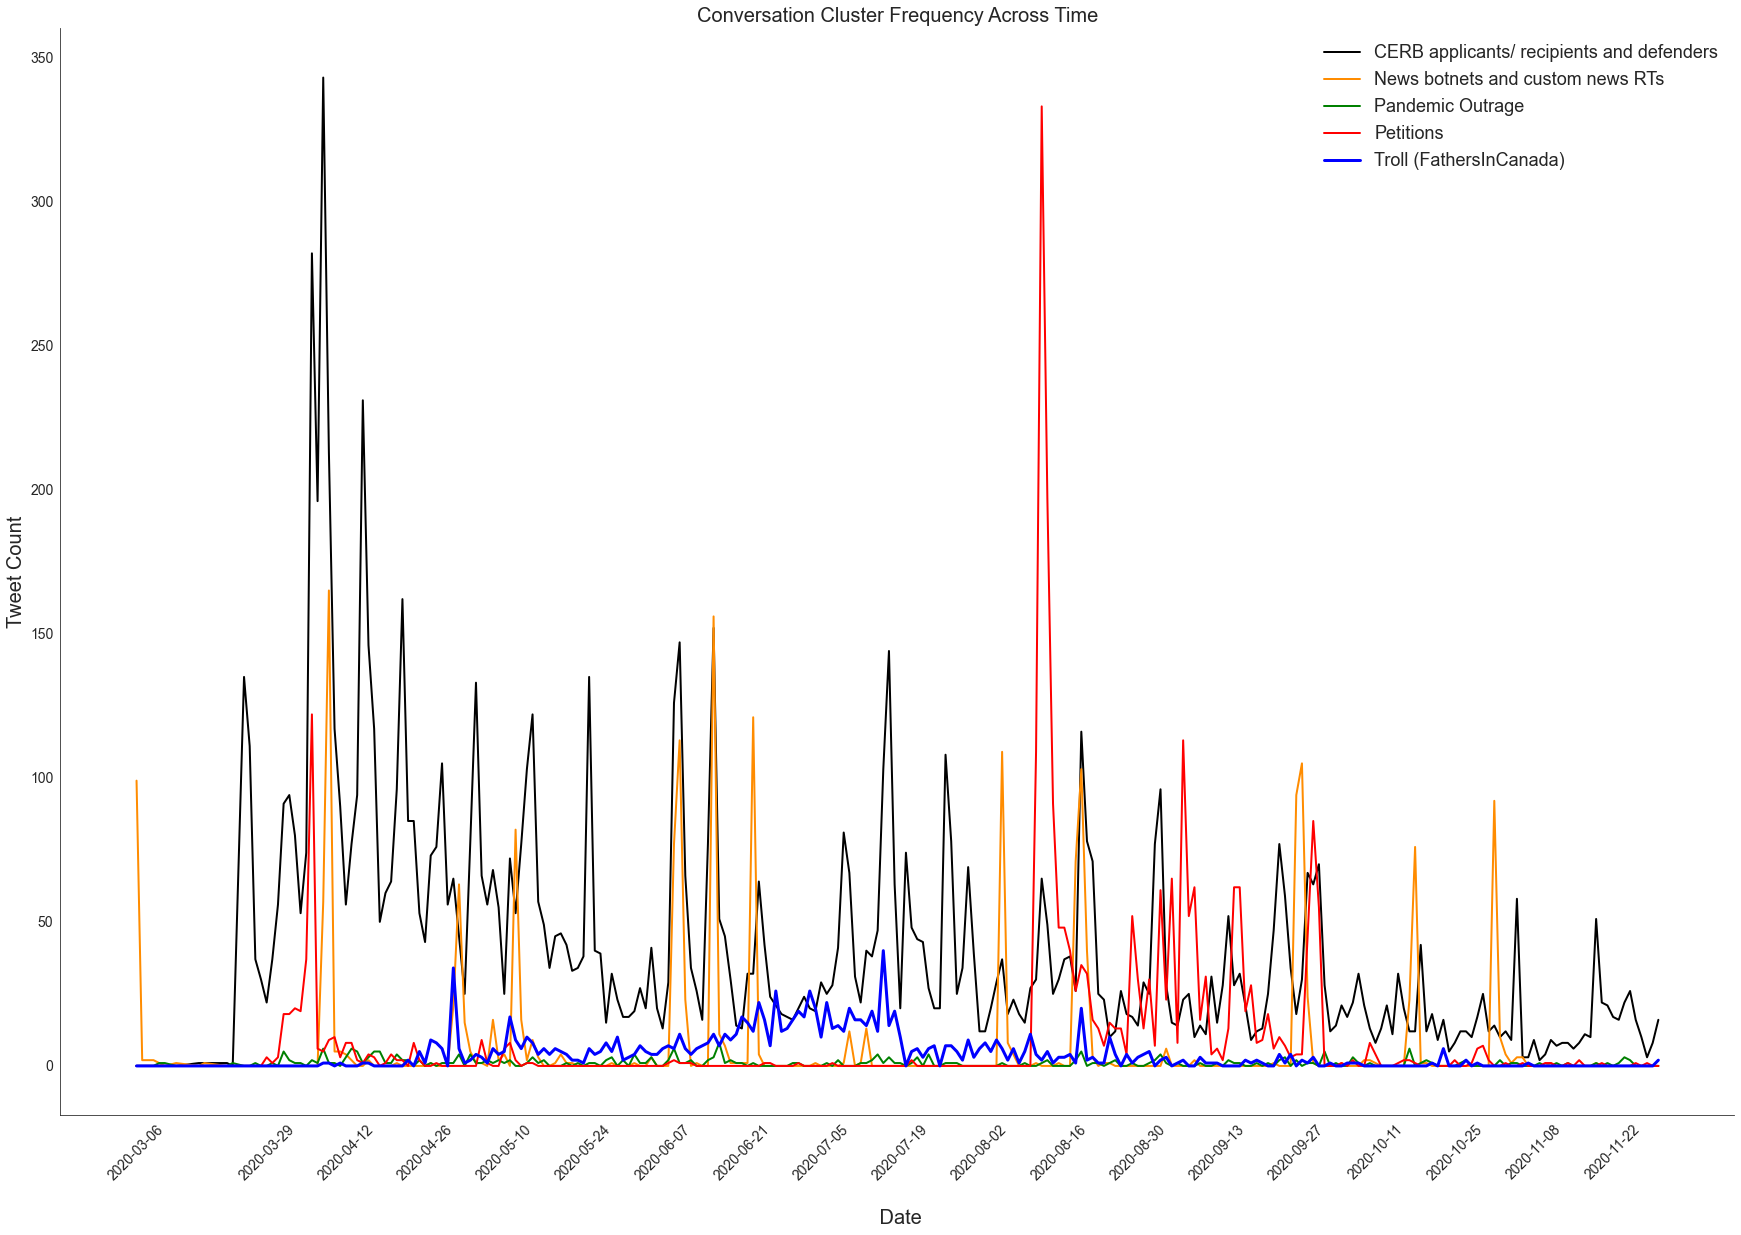

In [540]:
dates = date_freq.simple_date
x_ticks = list(date_freq.simple_date.unique()[::14])

zero = date_freq['CERB applicants/ recipients and defenders']
one = date_freq['News botnets and custom news RTs']
two = date_freq['Pandemic Outrage']
three = date_freq['Petitions']
four = date_freq['Troll (FathersInCanada)']


plt.figure(figsize=(30, 20))
plt.plot(dates, zero, color='black', linewidth=2, label='CERB applicants/ recipients and defenders')
plt.plot(dates, one, color='darkorange', linewidth=2, label='News botnets and custom news RTs')
plt.plot(dates, two, color='green', linewidth=2, label='Pandemic Outrage')
plt.plot(dates, three, color='r', linewidth=2, label='Petitions')
plt.plot(dates, four, color='blue', linewidth=3, label='Troll (FathersInCanada)')


plt.title('Conversation Cluster Frequency Across Time', fontsize=20)
plt.xlabel('\n Date', fontsize=20)
plt.ylabel('Tweet Count', fontsize=20)
plt.xticks(x_ticks, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', frameon=False, fontsize=18)
sns.despine()
#plt.savefig('../img/top_freq_timeseries.png');

In [517]:
df['compact'].value_counts(normalize=True)*100

CERB applicants/ recipients and defenders    66.010491
Petitions                                    14.516414
News botnets and custom news RTs             11.445748
Troll (FathersInCanada)                       6.506748
Pandemic Outrage                              1.520599
Name: compact, dtype: float64

### Cluster frequency

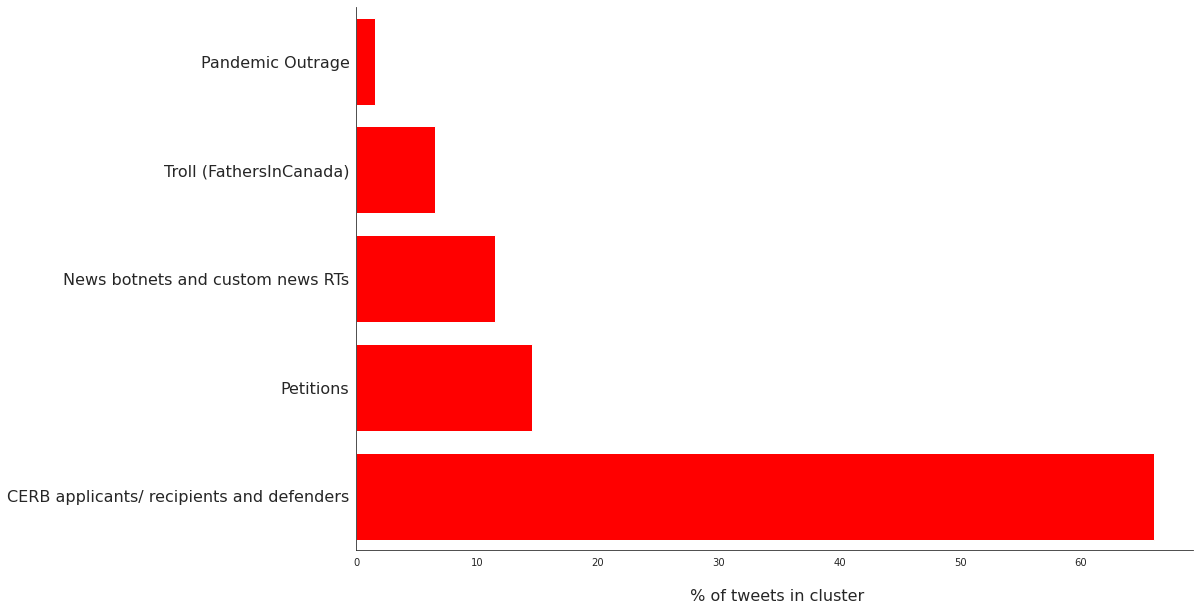

In [518]:
t_font = {'fontname':'Trebuchet MS Bold'}
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=14) 
custom_order = ['Pandemic Outrage', "Troll (FathersInCanada)", 'News botnets and custom news RTs','Petitions', 'CERB applicants/ recipients and defenders']
sns.barplot(y=df['compact'].value_counts().index, 
            x=df['compact'].value_counts(normalize=True, ascending=False)*100, 
            data=df, orient='h', 
            order = custom_order, color='red', saturation=1
           )
plt.xlabel('\n % of tweets in cluster', fontsize=16, **t_font)
# plt.ylabel(fontsize=12, **t_font)

sns.despine();

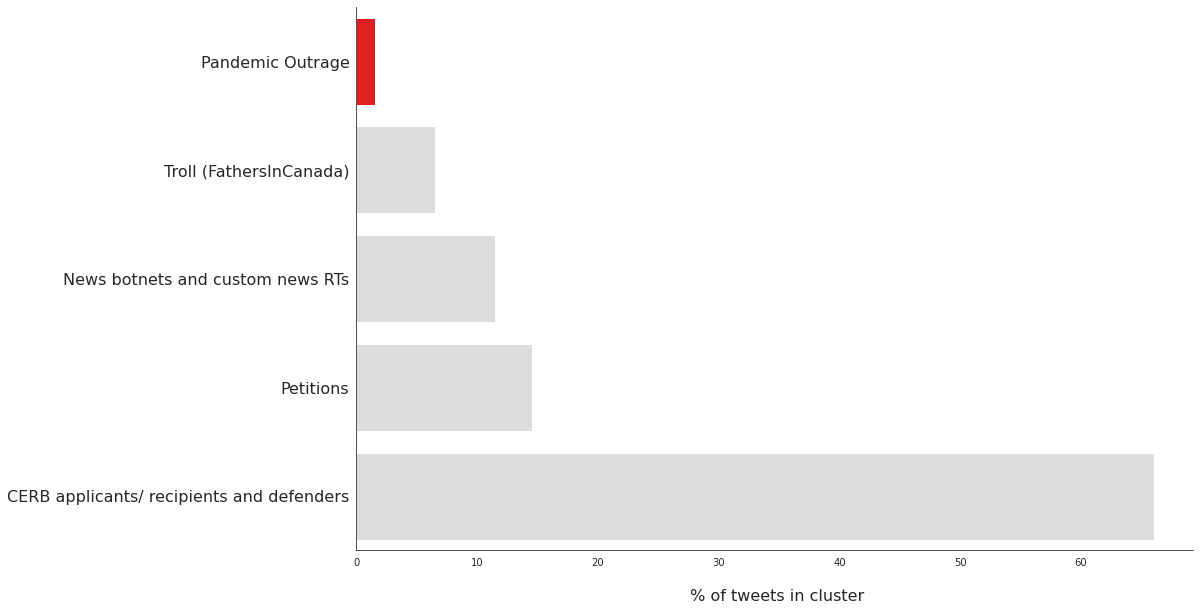

In [519]:
emphasize = df['compact'].value_counts().index[0]
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=14) 
# custom_order = ['Pandemic Outrage and Trolls', "Troll (FathersInCanada)", 'News botnets and custom news RTs','Petitions', 'CERB applicants/ recipients and defenders']
sns.barplot(y=df['compact'].value_counts().index, 
            x=df['compact'].value_counts(normalize=True)*100, 
            order=custom_order, data=df, orient='h', 
             palette=['red' if y in emphasize else 'gainsboro' for y in df['compact'].value_counts().index]
           )
plt.xlabel('\n % of tweets in cluster', fontsize=16, **t_font)
# plt.ylabel(fontsize=12, **t_font)

sns.despine()

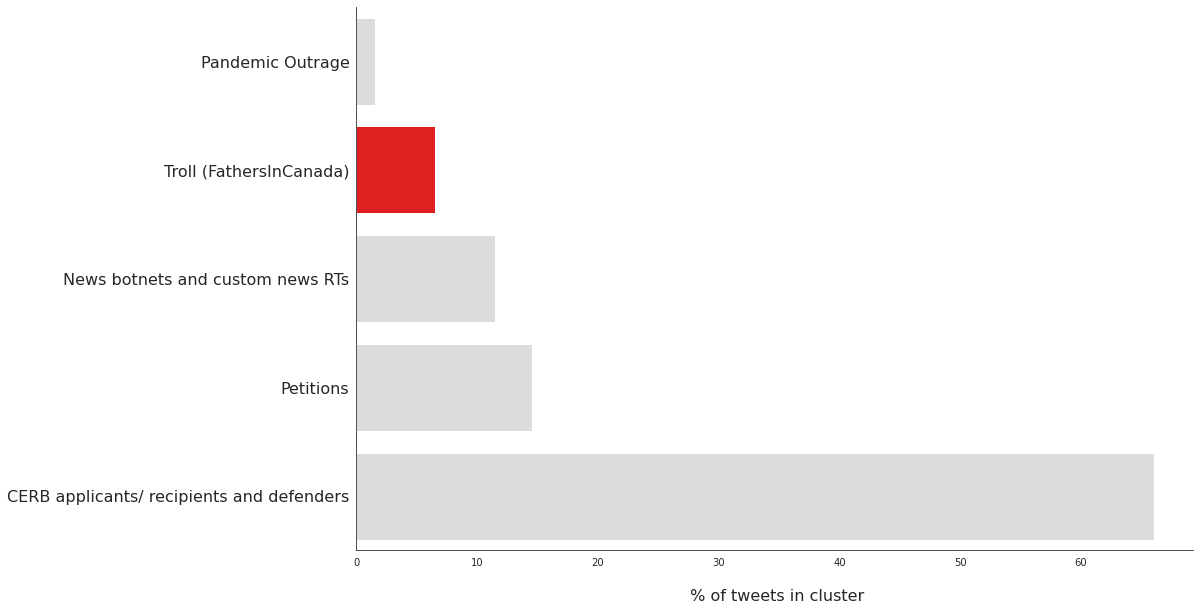

In [520]:
emphasize = df['compact'].value_counts().index[1]
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=14) 
# custom_order = ['Fraud', 'Pandemic Outrage', "Troll (FathersInCanada)", 'News botnets and custom RTs','Petitions', 'CERB applicants/ recipients and defenders']
sns.barplot(y=df['compact'].value_counts().index, 
            x=df['compact'].value_counts(normalize=True)*100, 
            order=custom_order, data=df, orient='h', 
             palette=['red' if y in emphasize else 'gainsboro' for y in df['compact'].value_counts().index]
           )
plt.xlabel('\n % of tweets in cluster', fontsize=16, **t_font)
# plt.ylabel(fontsize=12, **t_font)

sns.despine()

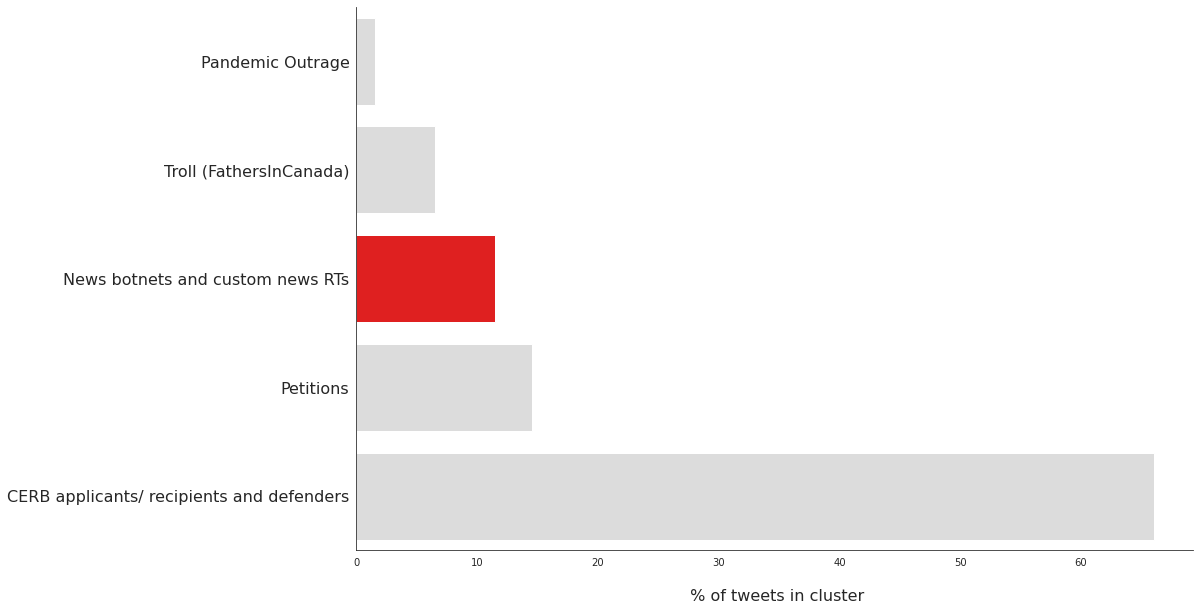

In [521]:
emphasize = df['compact'].value_counts().index[2]
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=14) 
# custom_order = ['Fraud', 'Pandemic Outrage', "Troll (FathersInCanada)", 'News botnets and custom RTs','Petitions', 'CERB applicants/ recipients and defenders']
sns.barplot(y=df['compact'].value_counts().index, 
            x=df['compact'].value_counts(normalize=True)*100, 
            order=custom_order, data=df, orient='h', 
             palette=['red' if y in emphasize else 'gainsboro' for y in df['compact'].value_counts().index]
           )
plt.xlabel('\n % of tweets in cluster', fontsize=16, **t_font)
# plt.ylabel(fontsize=12, **t_font)

sns.despine()

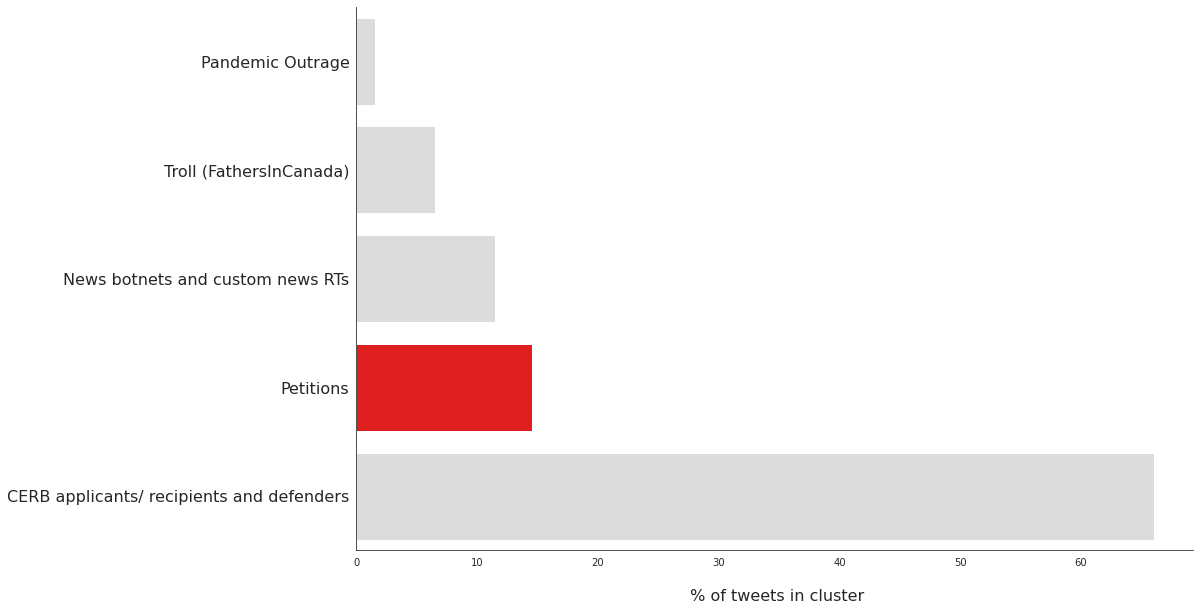

In [522]:
emphasize = df['compact'].value_counts().index[3]
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=14) 
# custom_order = ['Fraud', 'Pandemic Outrage', "Troll (FathersInCanada)", 'News botnets and custom RTs','Petitions', 'CERB applicants/ recipients and defenders']
sns.barplot(y=df['compact'].value_counts().index, 
            x=df['compact'].value_counts(normalize=True)*100, 
            order=custom_order, data=df, orient='h', 
             palette=['red' if y in emphasize else 'gainsboro' for y in df['compact'].value_counts().index]
           )
plt.xlabel('\n % of tweets in cluster', fontsize=16, **t_font)
# plt.ylabel(fontsize=12, **t_font)

sns.despine()

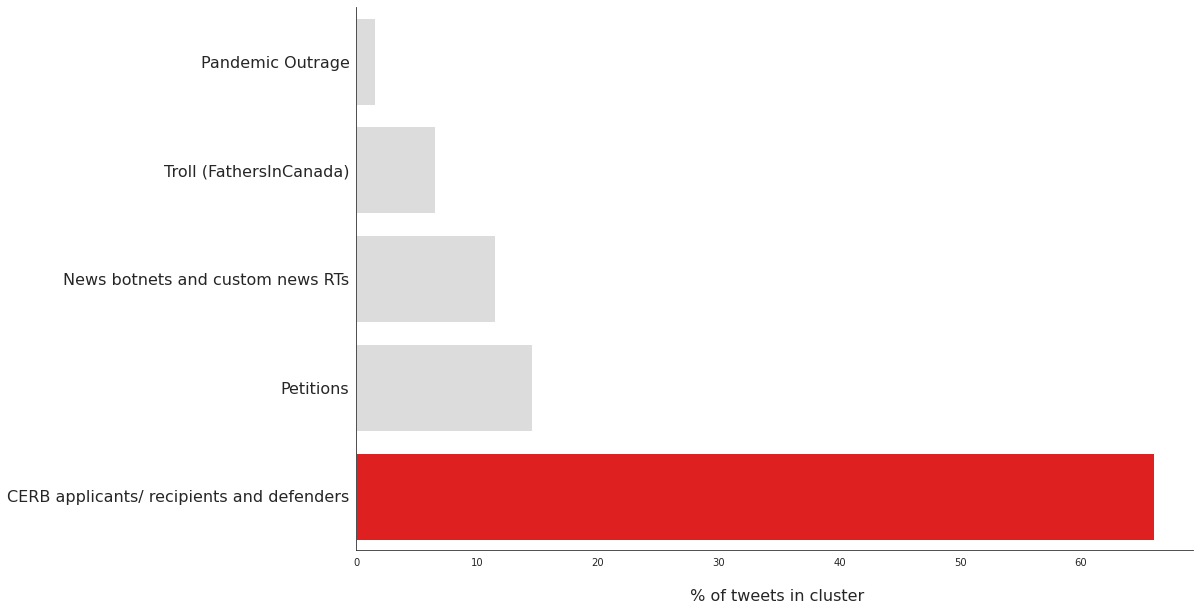

In [523]:
emphasize = df['compact'].value_counts().index[4]
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=14) 
# custom_order = ['Fraud', 'Pandemic Outrage', "Troll (FathersInCanada)", 'News botnets and custom RTs','Petitions', 'CERB applicants/ recipients and defenders']
sns.barplot(y=df['compact'].value_counts().index, 
            x=df['compact'].value_counts(normalize=True)*100, 
            order=custom_order, data=df, orient='h', 
             palette=['red' if y in emphasize else 'gainsboro' for y in df['compact'].value_counts().index]
           )
plt.xlabel('\n % of tweets in cluster', fontsize=16, **t_font)
# plt.ylabel(fontsize=12, **t_font)

sns.despine()

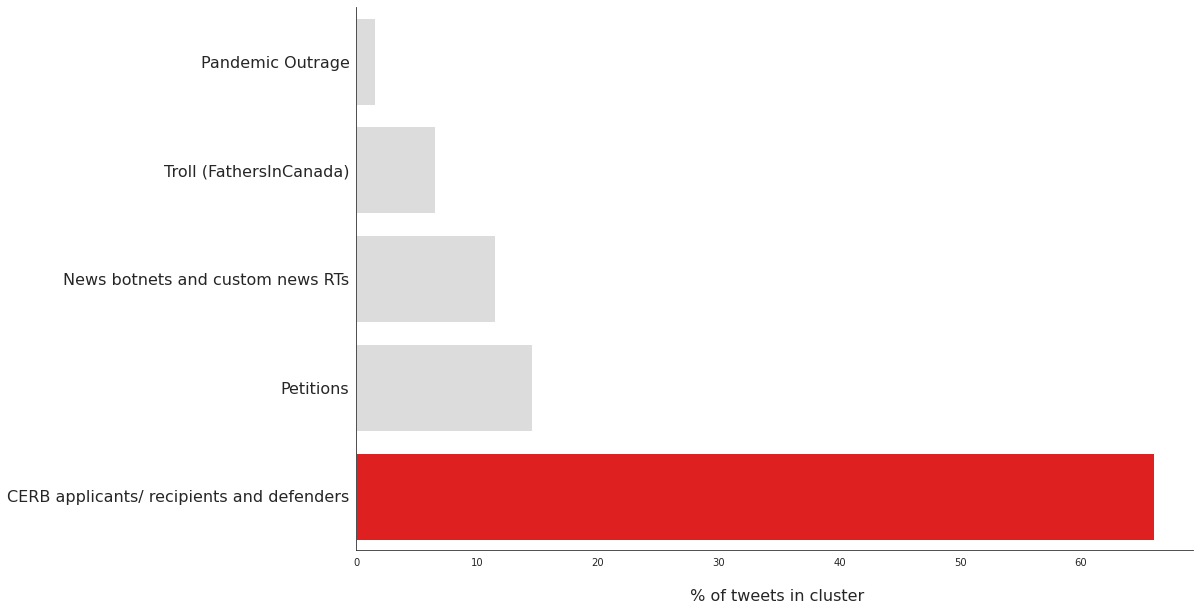

In [546]:
emphasize = [df['compact'].value_counts().index[4]]
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=14) 
# custom_order = ['Fraud', 'Pandemic Outrage', "Troll (FathersInCanada)", 'News botnets and custom RTs','Petitions', 'CERB applicants/ recipients and defenders']
sns.barplot(y=df['compact'].value_counts().index, 
            x=df['compact'].value_counts(normalize=True)*100, 
            order=custom_order, data=df, orient='h', 
             palette=['red' if y in emphasize else 'gainsboro' for y in df['compact'].value_counts().index]
           )
plt.xlabel('\n % of tweets in cluster', fontsize=16, **t_font)
# plt.ylabel(fontsize=12, **t_font)

sns.despine()